In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from os.path import join
import os
import random
from functools import partial
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape, concatenate
from keras.optimizers import Nadam
from keras.layers.advanced_activations import ELU
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.backend import binary_crossentropy
import ntpath

import tensorflow as tf

K.clear_session()
K.set_image_dim_ordering('tf')

print(K.image_data_format())
smooth = 1e-12
num_examples = 0

channels_last


In [15]:

def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)



In [16]:
def preprocess_old(image, gray):
    mask = np.ones((512,512), dtype="uint8") * 255
    nu=0
    _, contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i, c in enumerate(contours):
        area = int(cv2.contourArea(c))
        if area <10:
            
            if nu<1:
                print(area)
                nu=nu+1
                cv2.drawContours(mask, [c], -1, 0, -1)
    image = cv2.bitwise_and(image, image, mask=mask)
    return image

In [17]:
def preprocess(image, gray):
    ret, gray = cv2.threshold(gray, 250, 255,0)
    imageha, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    #x,y,w,h = cv2.boundingRect(largest_areas[-1])
    mask = np.zeros((512,512),dtype= np.uint8)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    rt = cv2.bitwise_and(image, image, mask=mask)
    return rt

In [18]:
model = load_model('modeltr.h5', custom_objects={'jaccard_coef_int': jaccard_coef_int,'jaccard_coef_loss': jaccard_coef_loss})

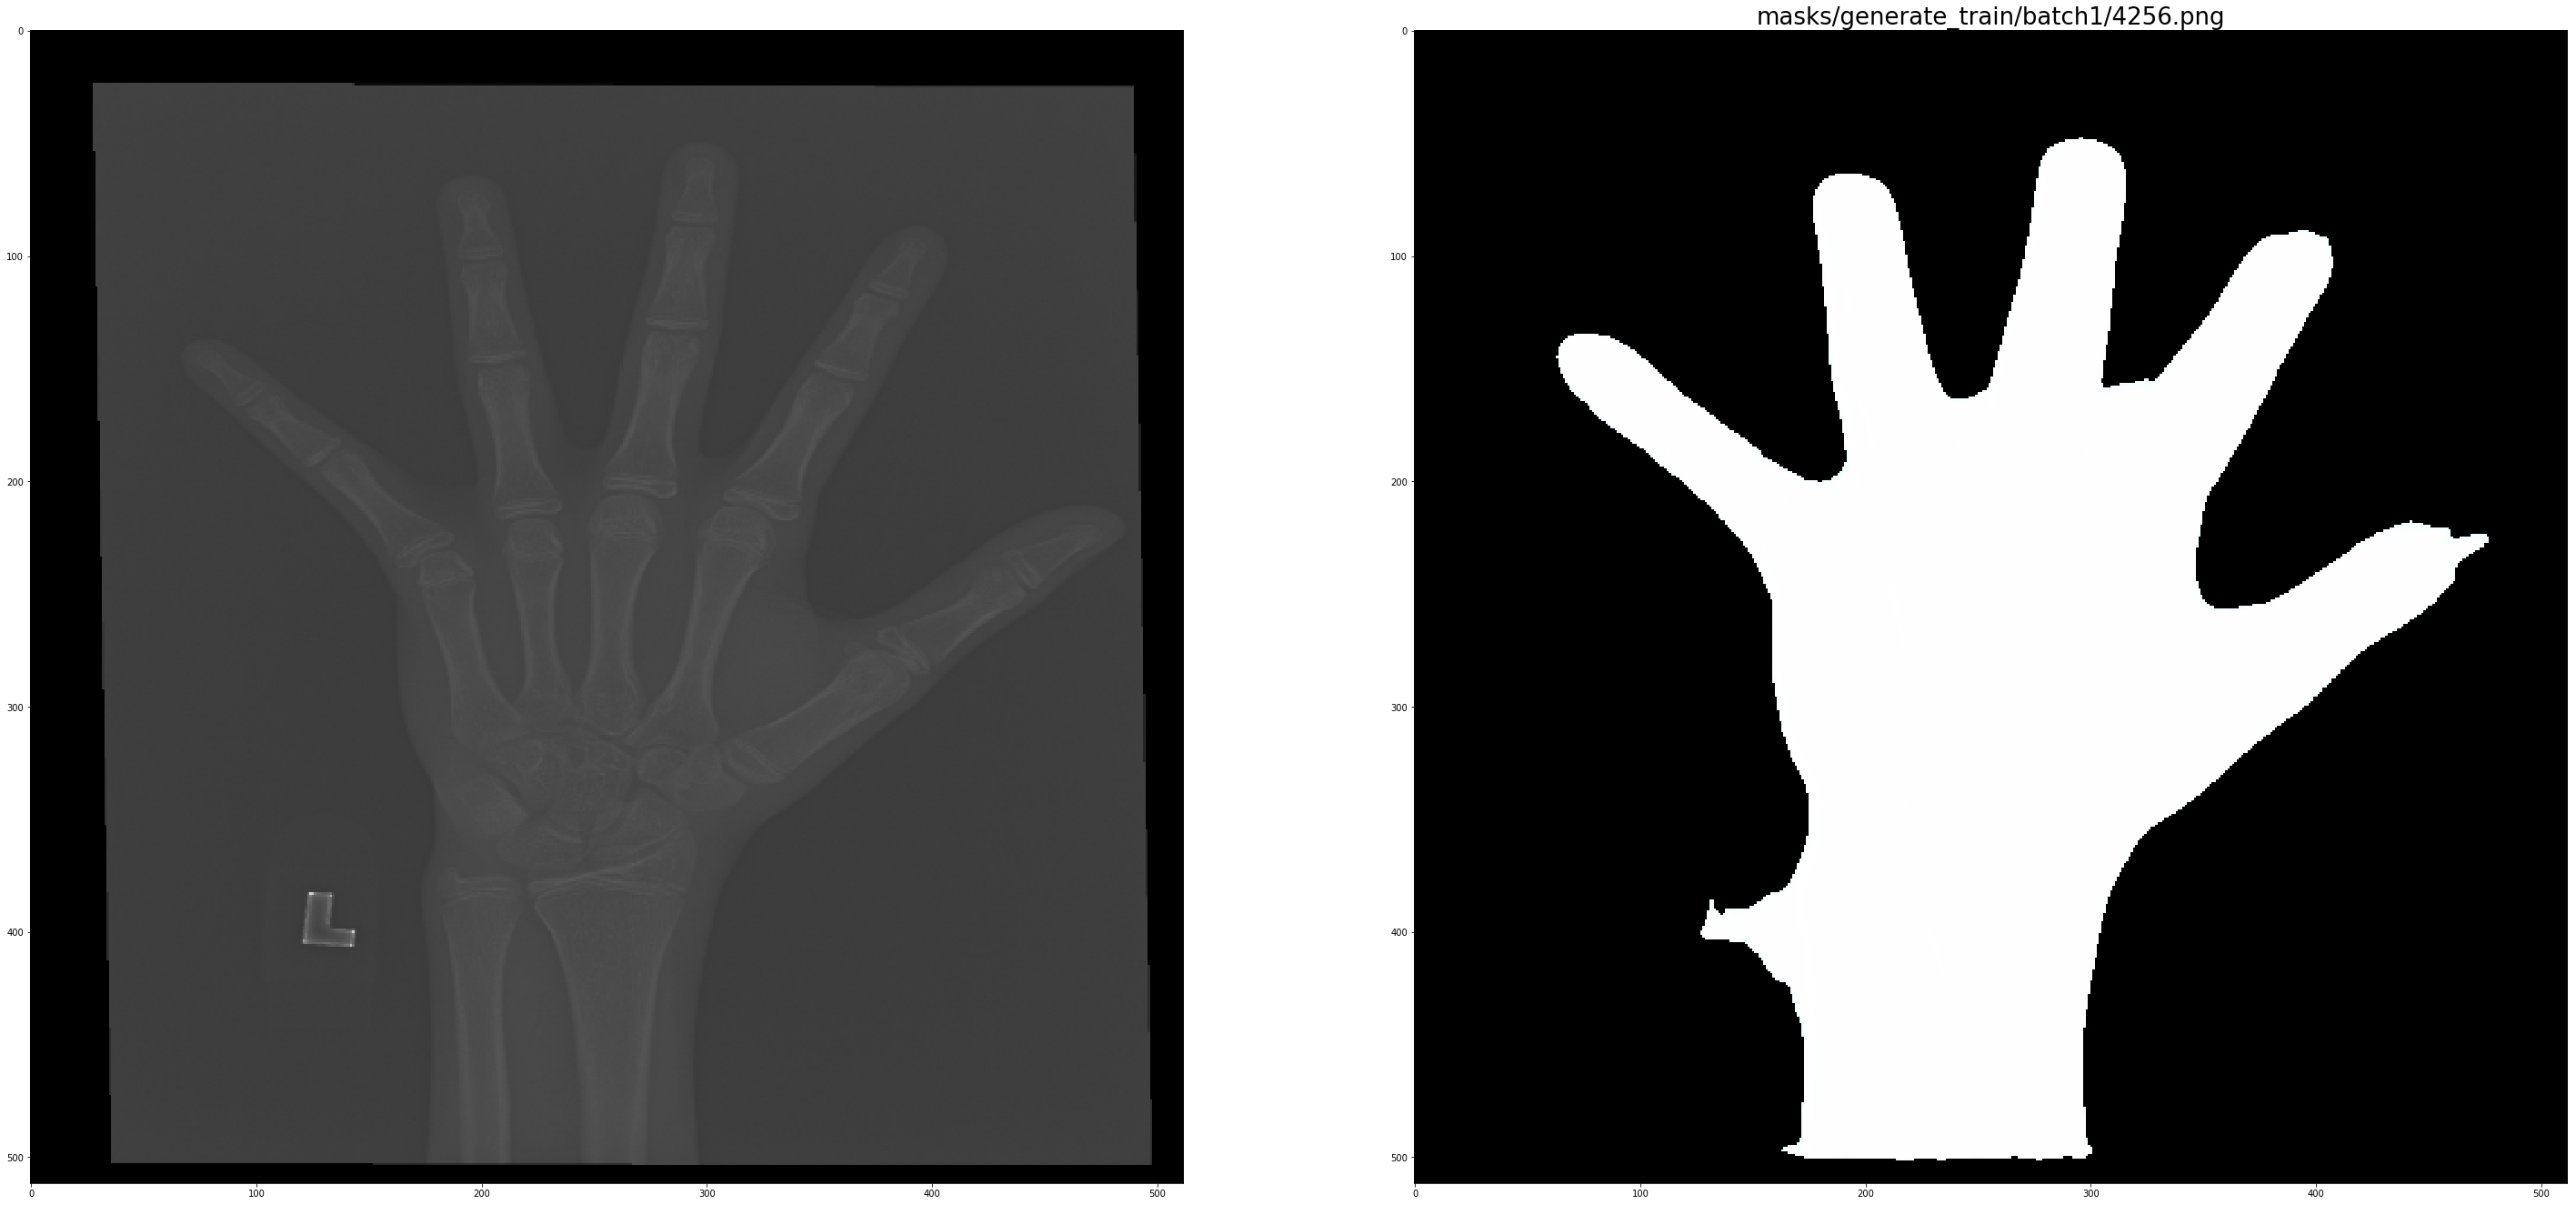

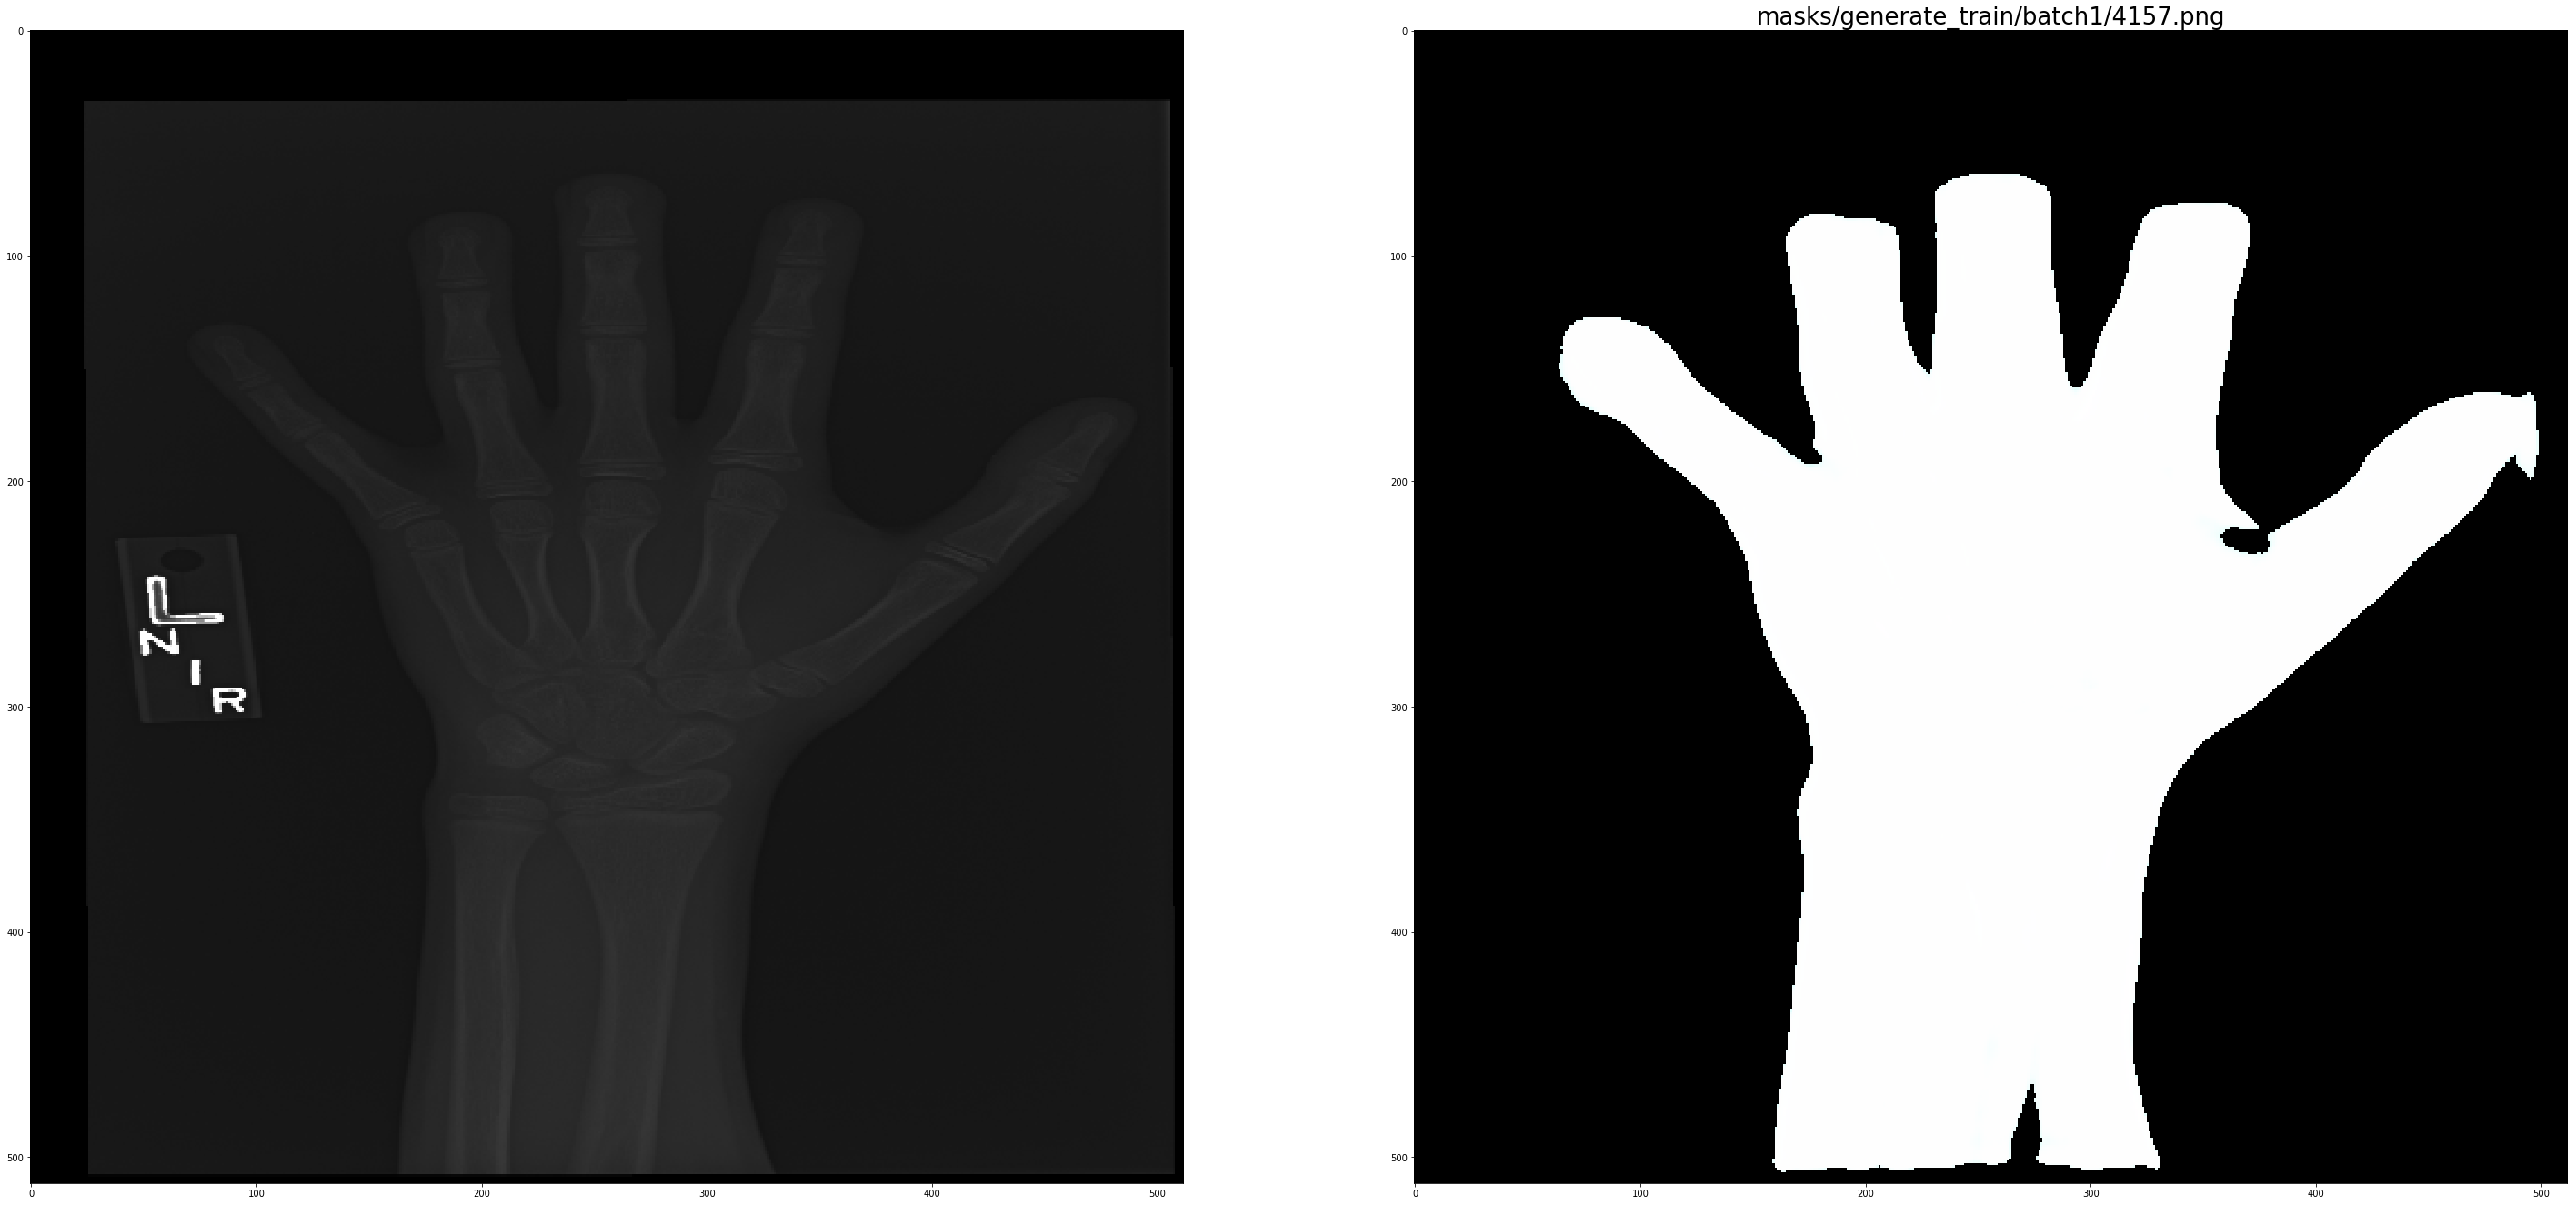

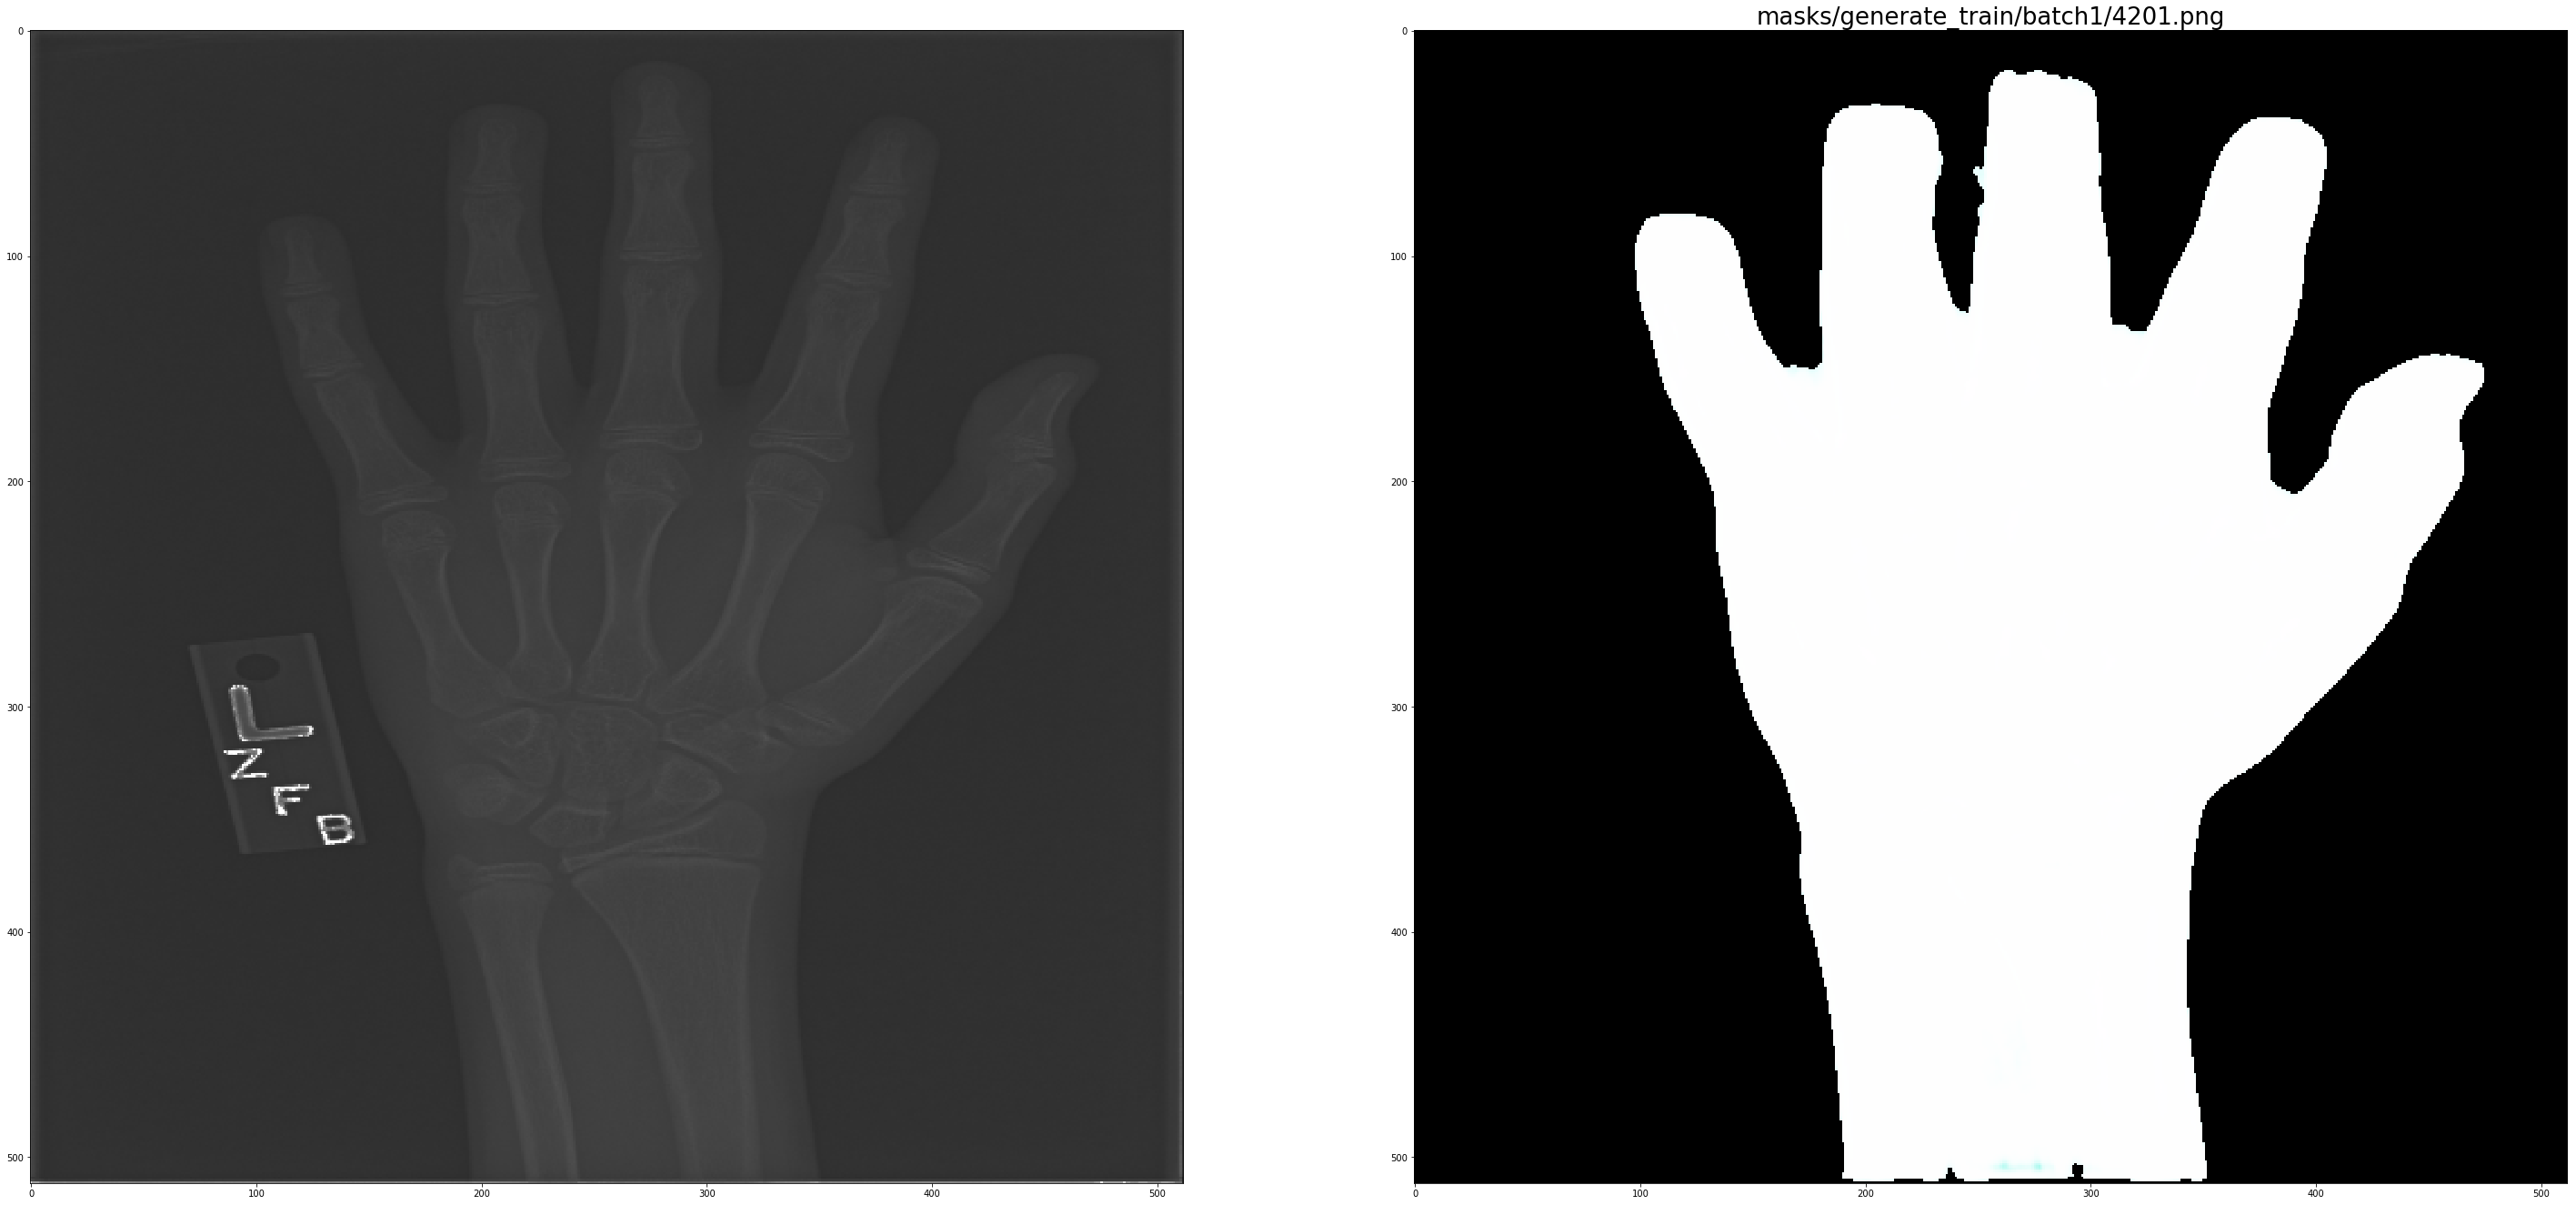

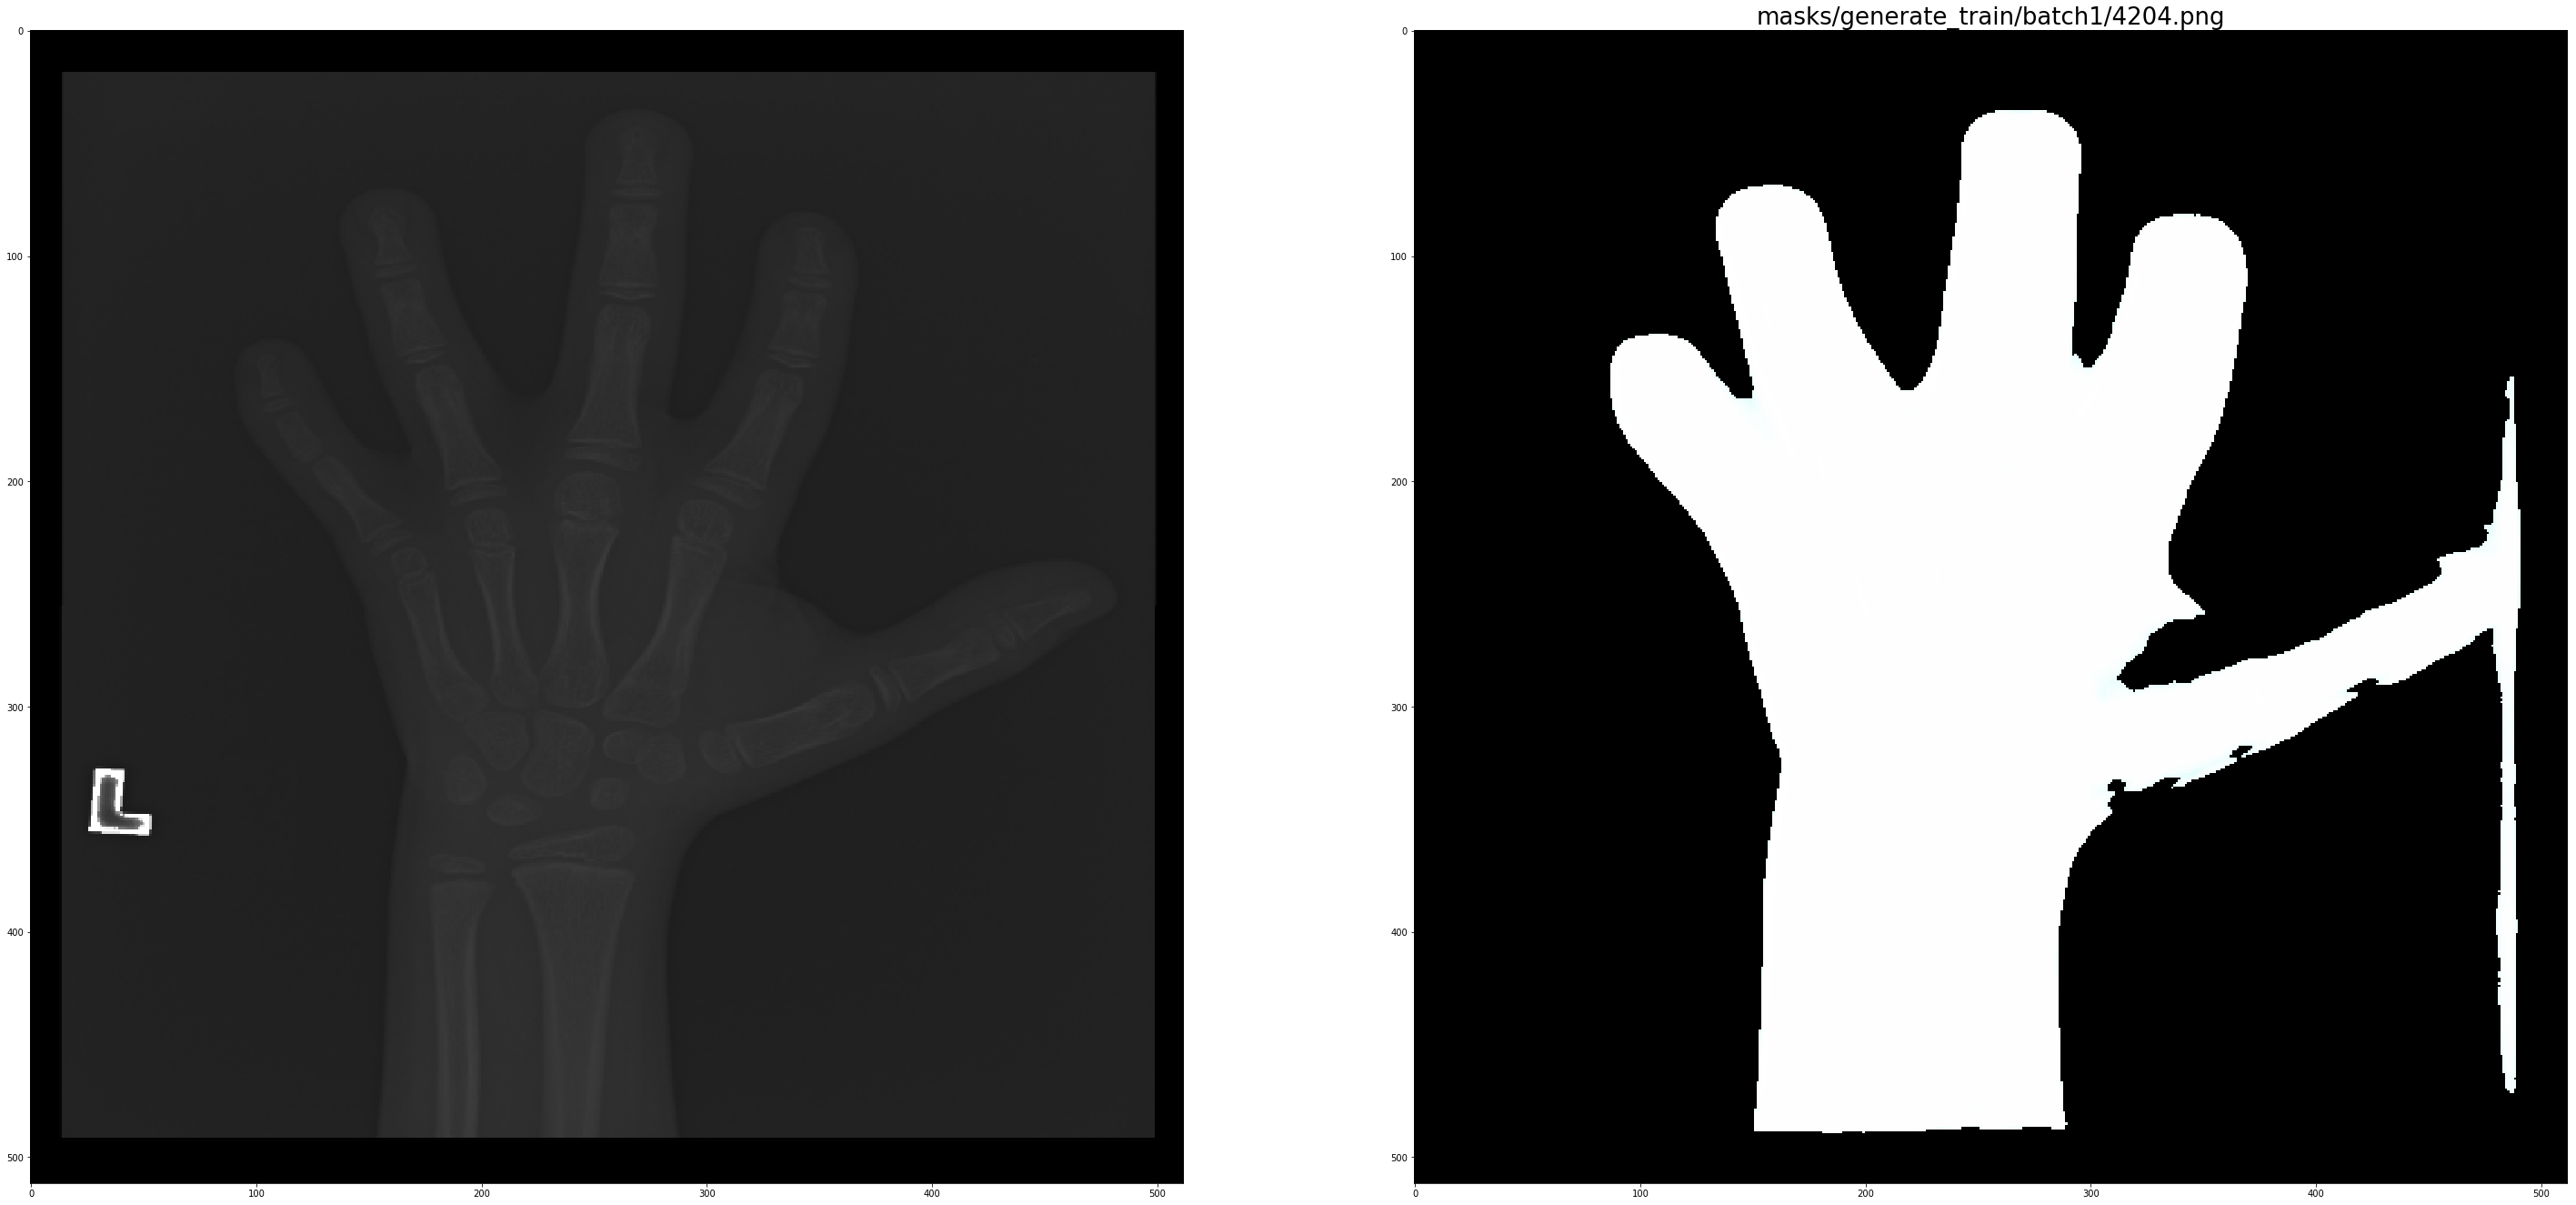

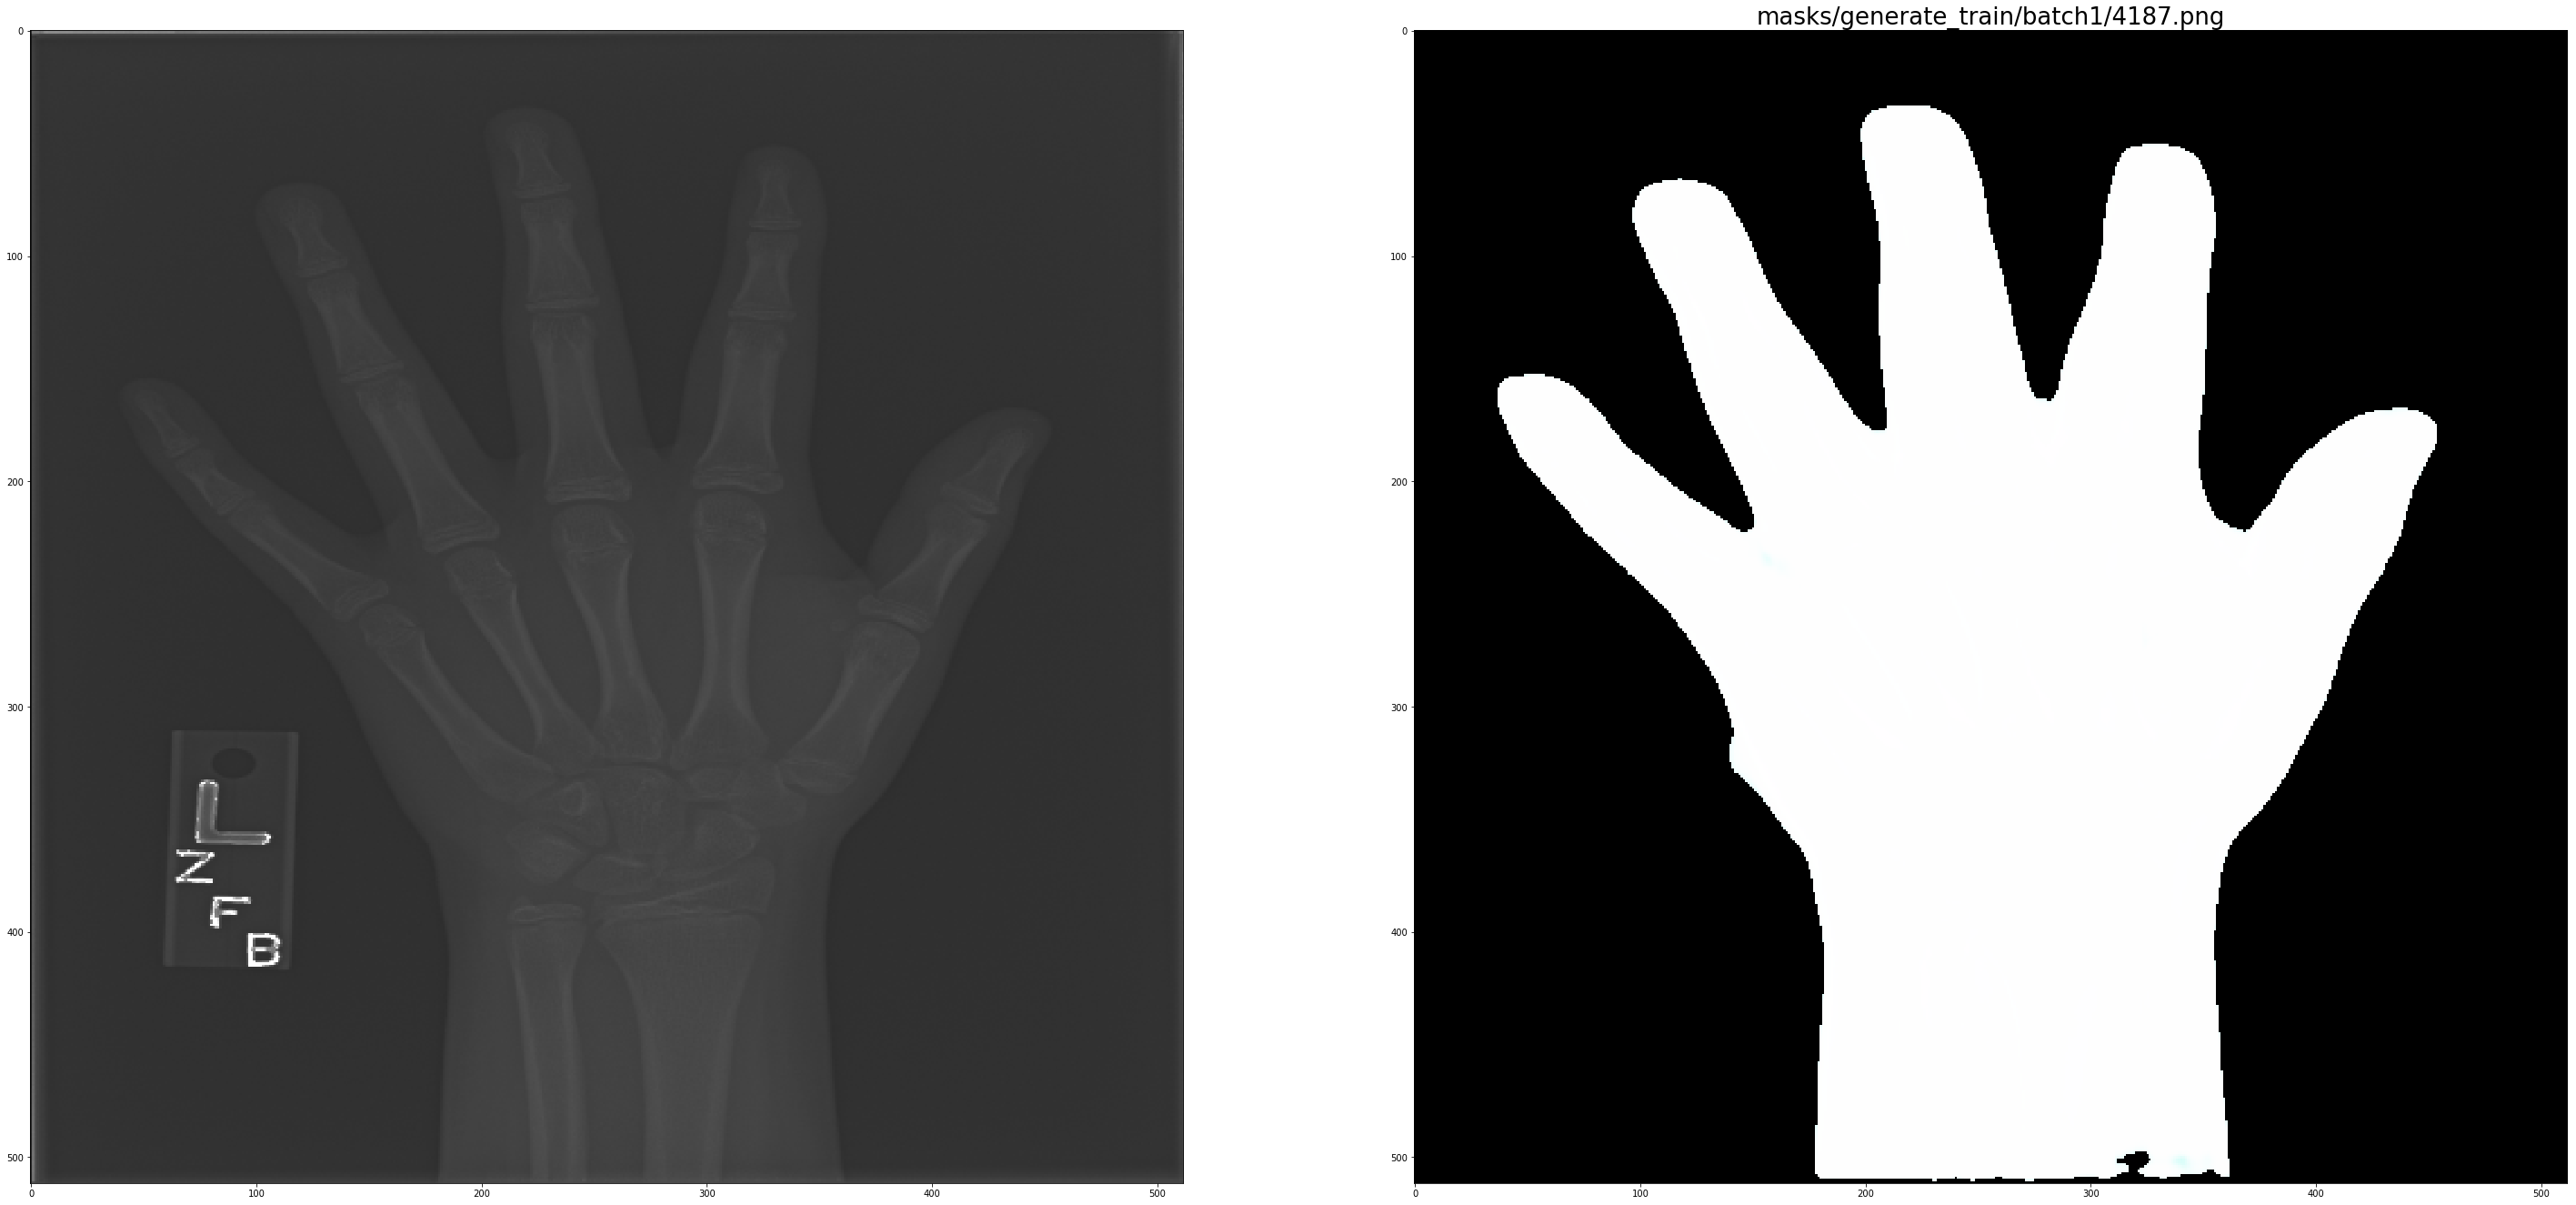

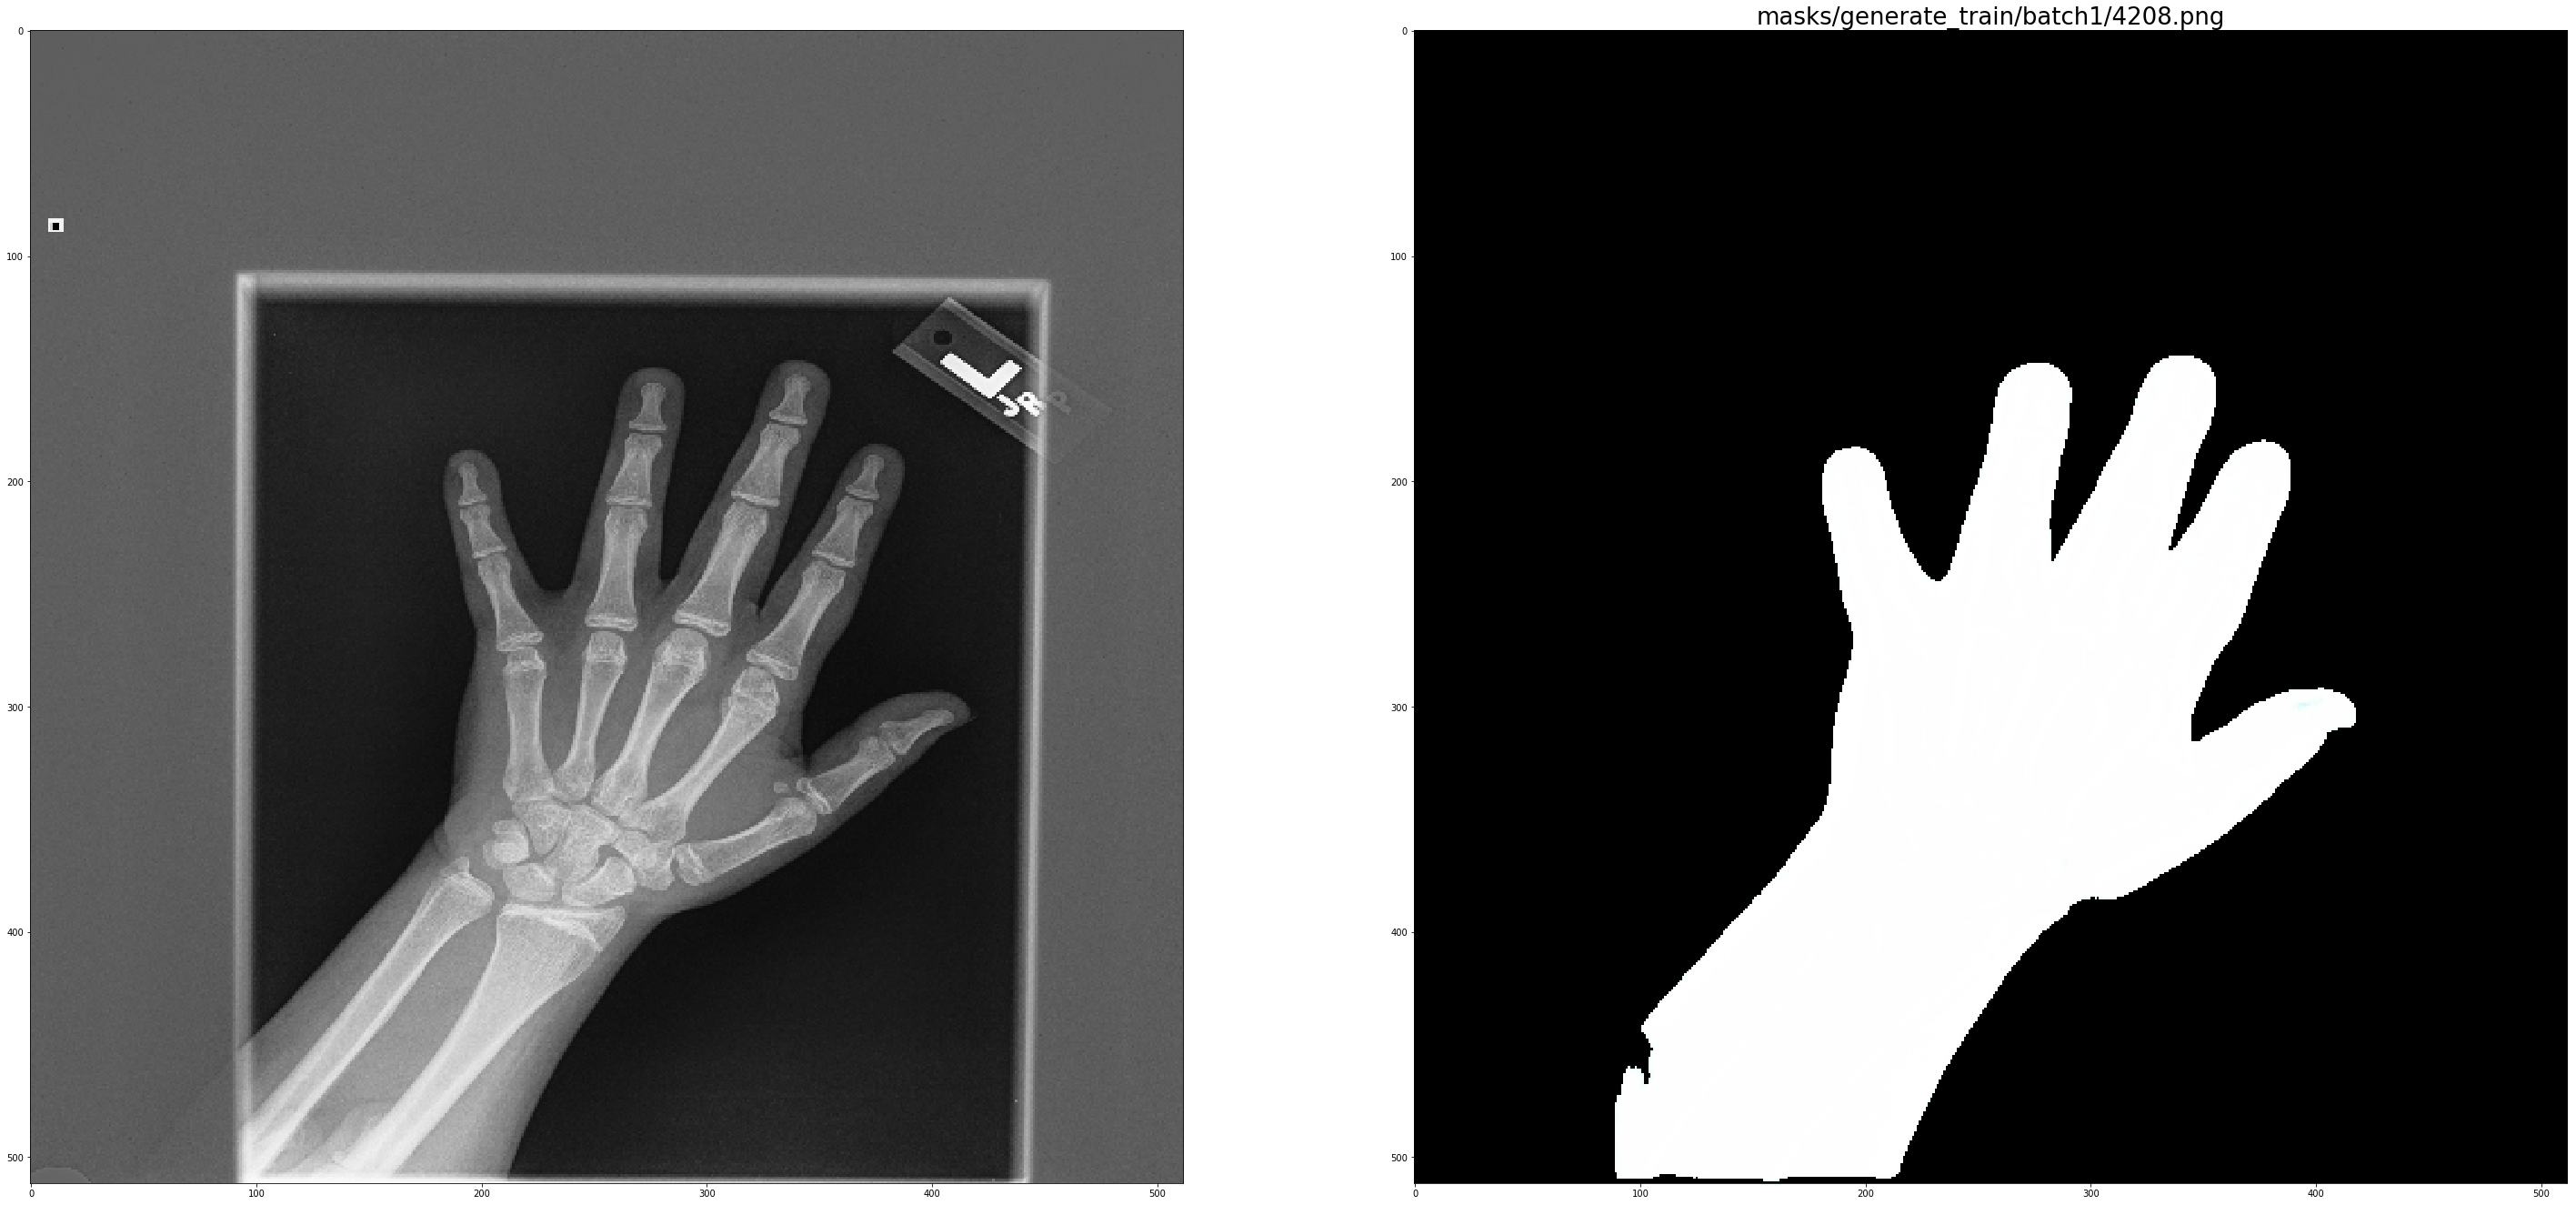

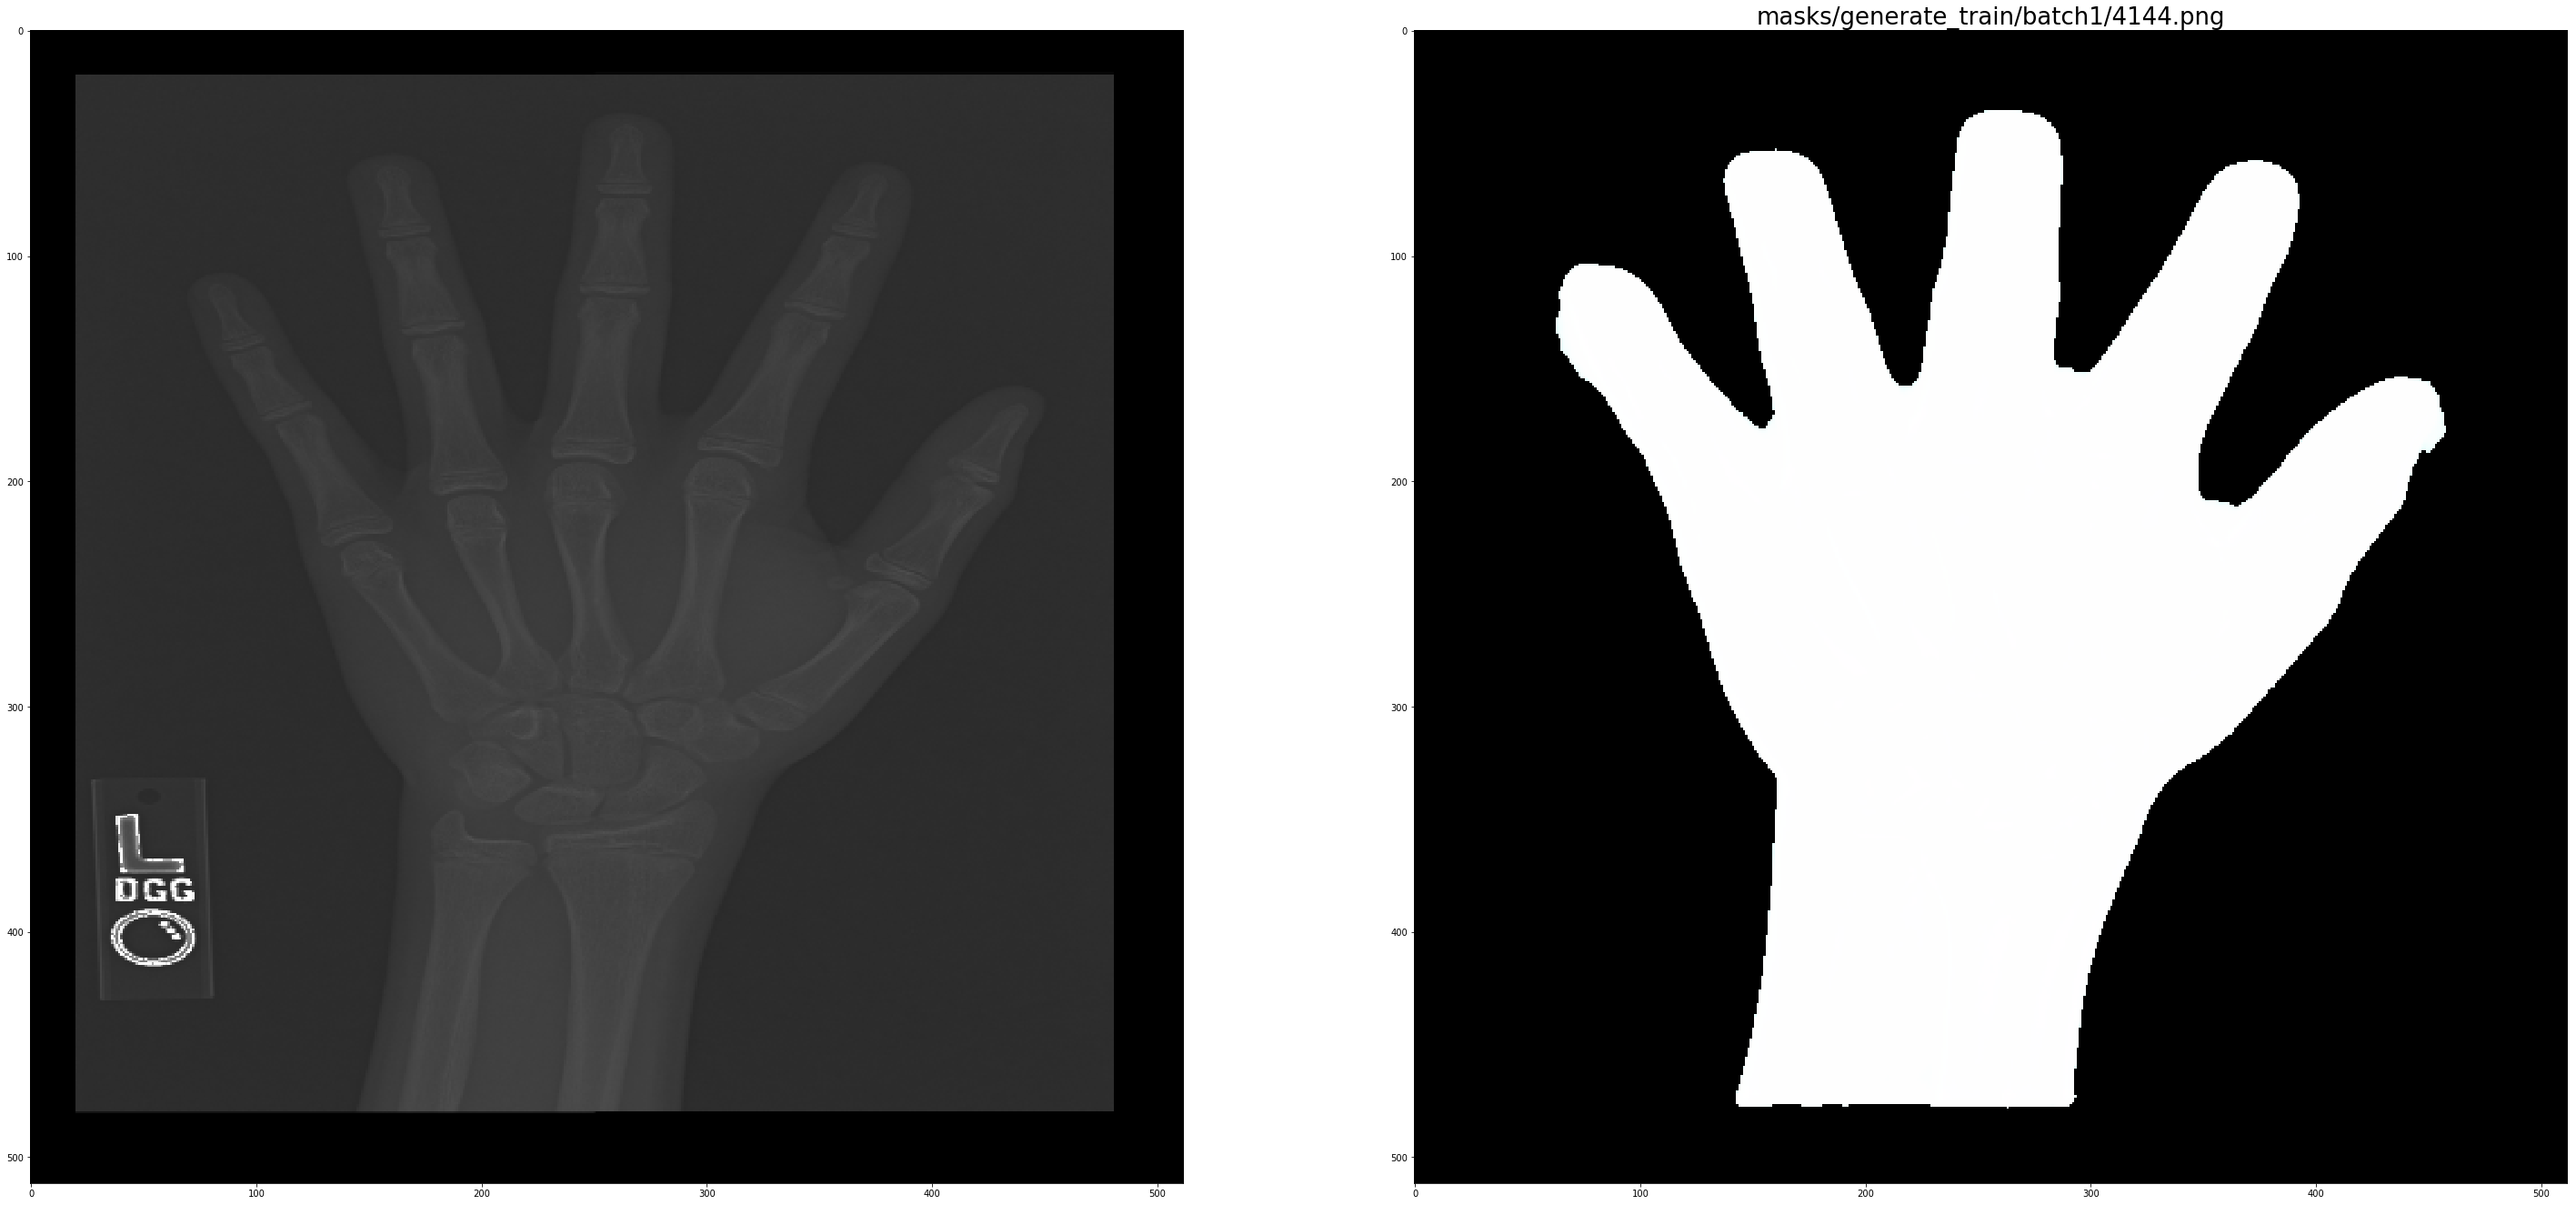

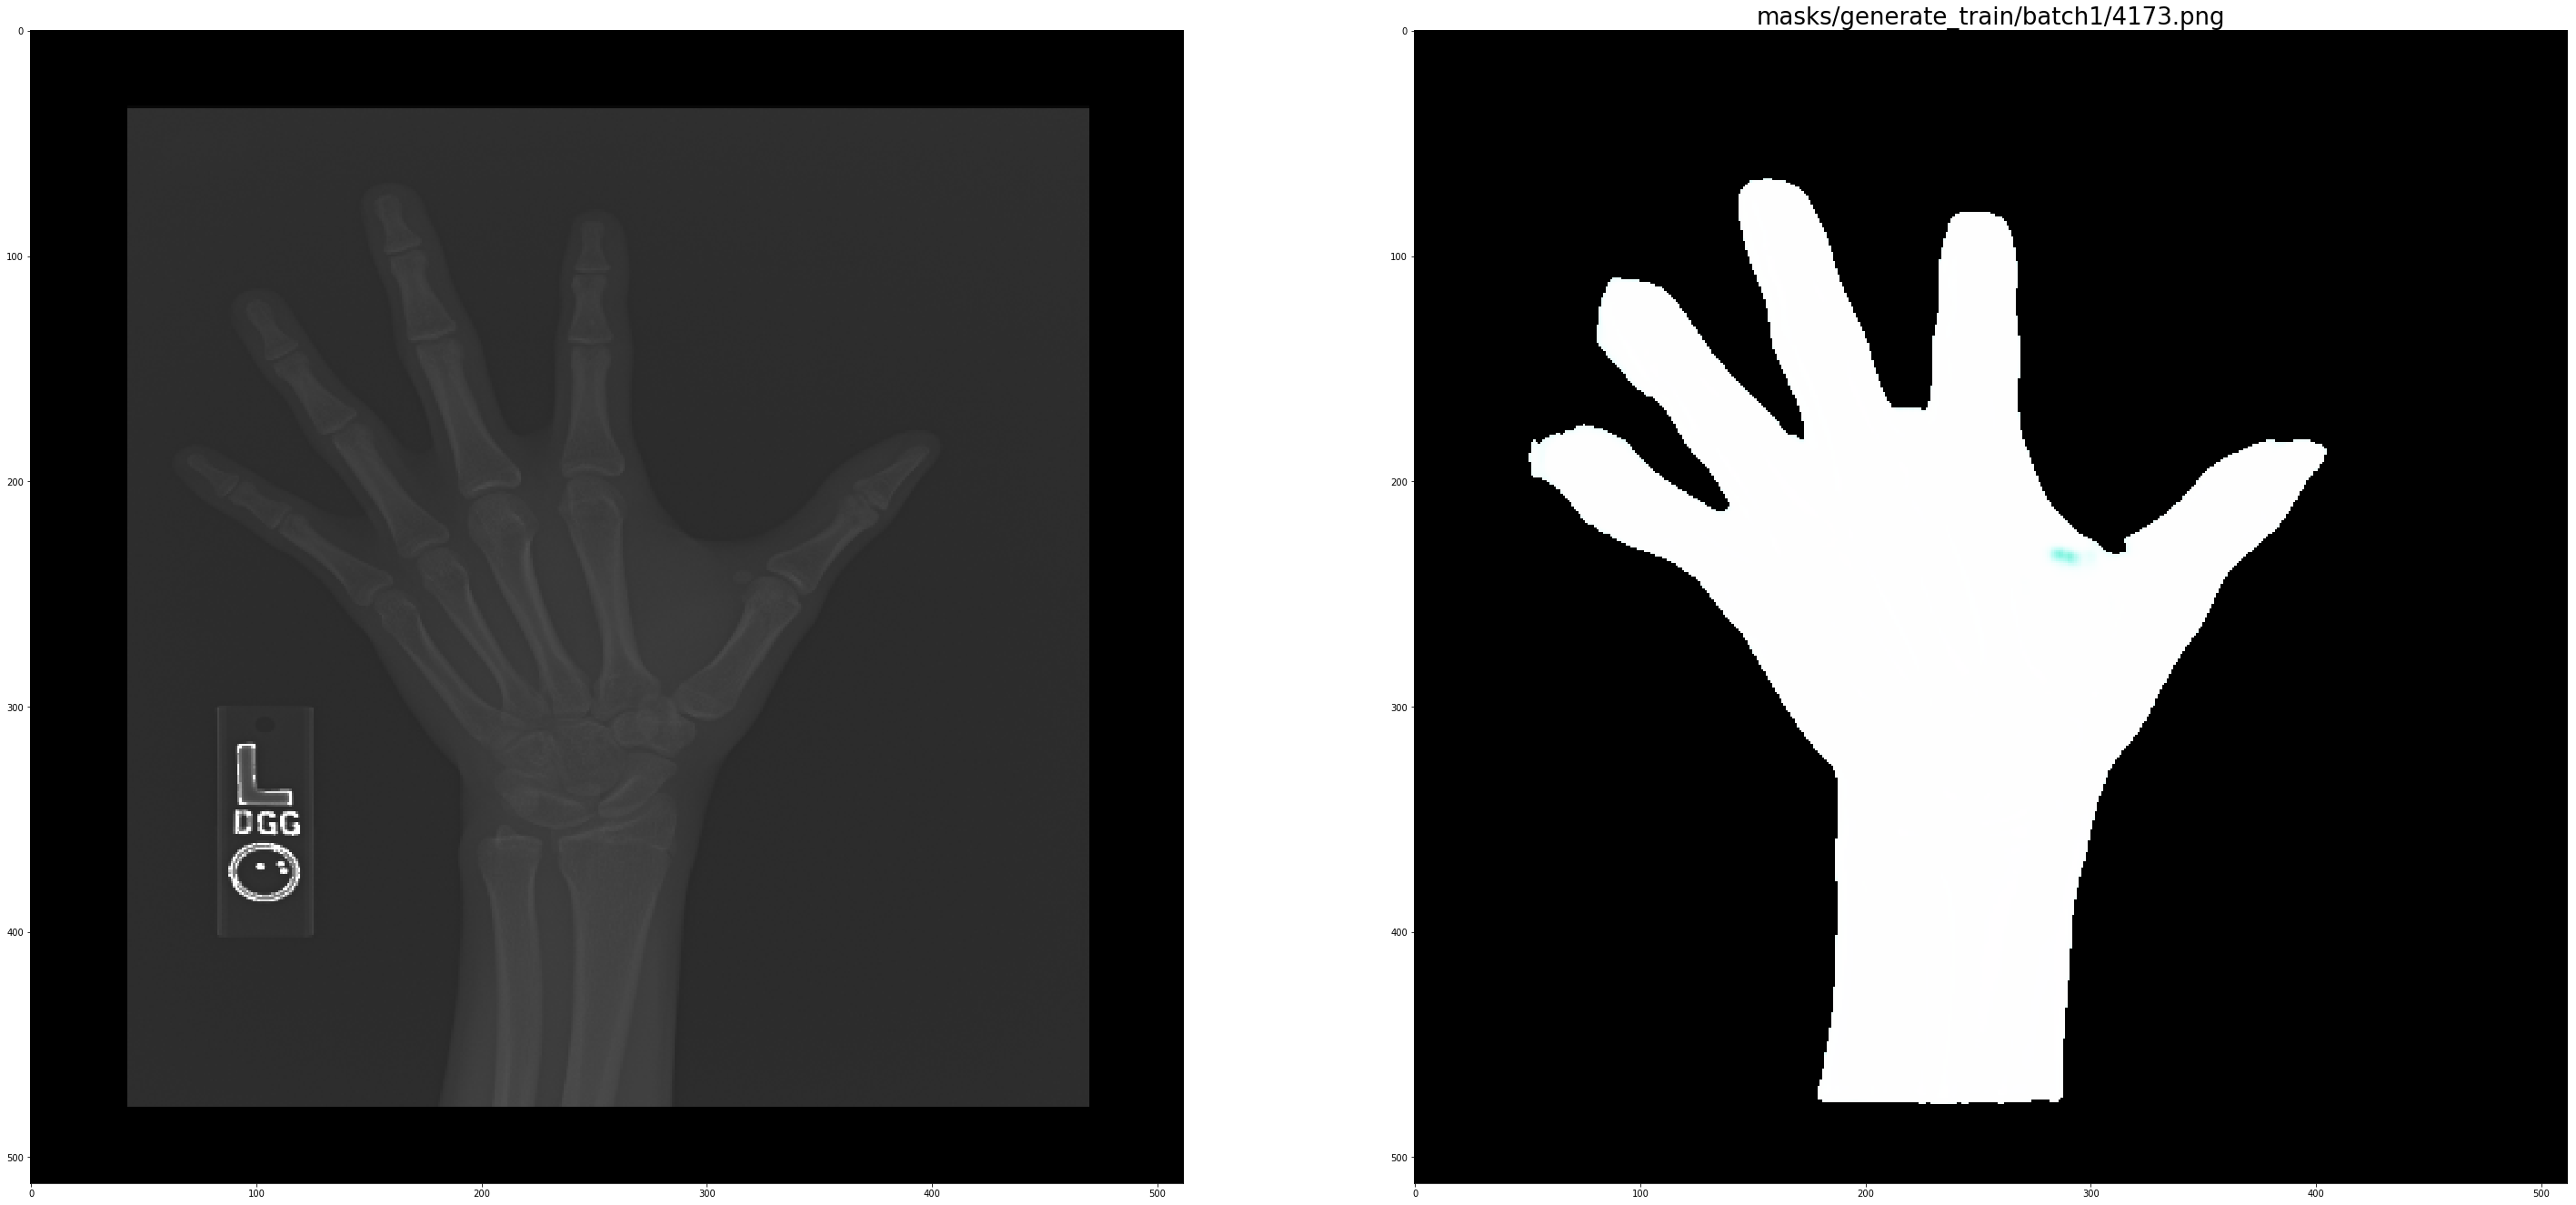

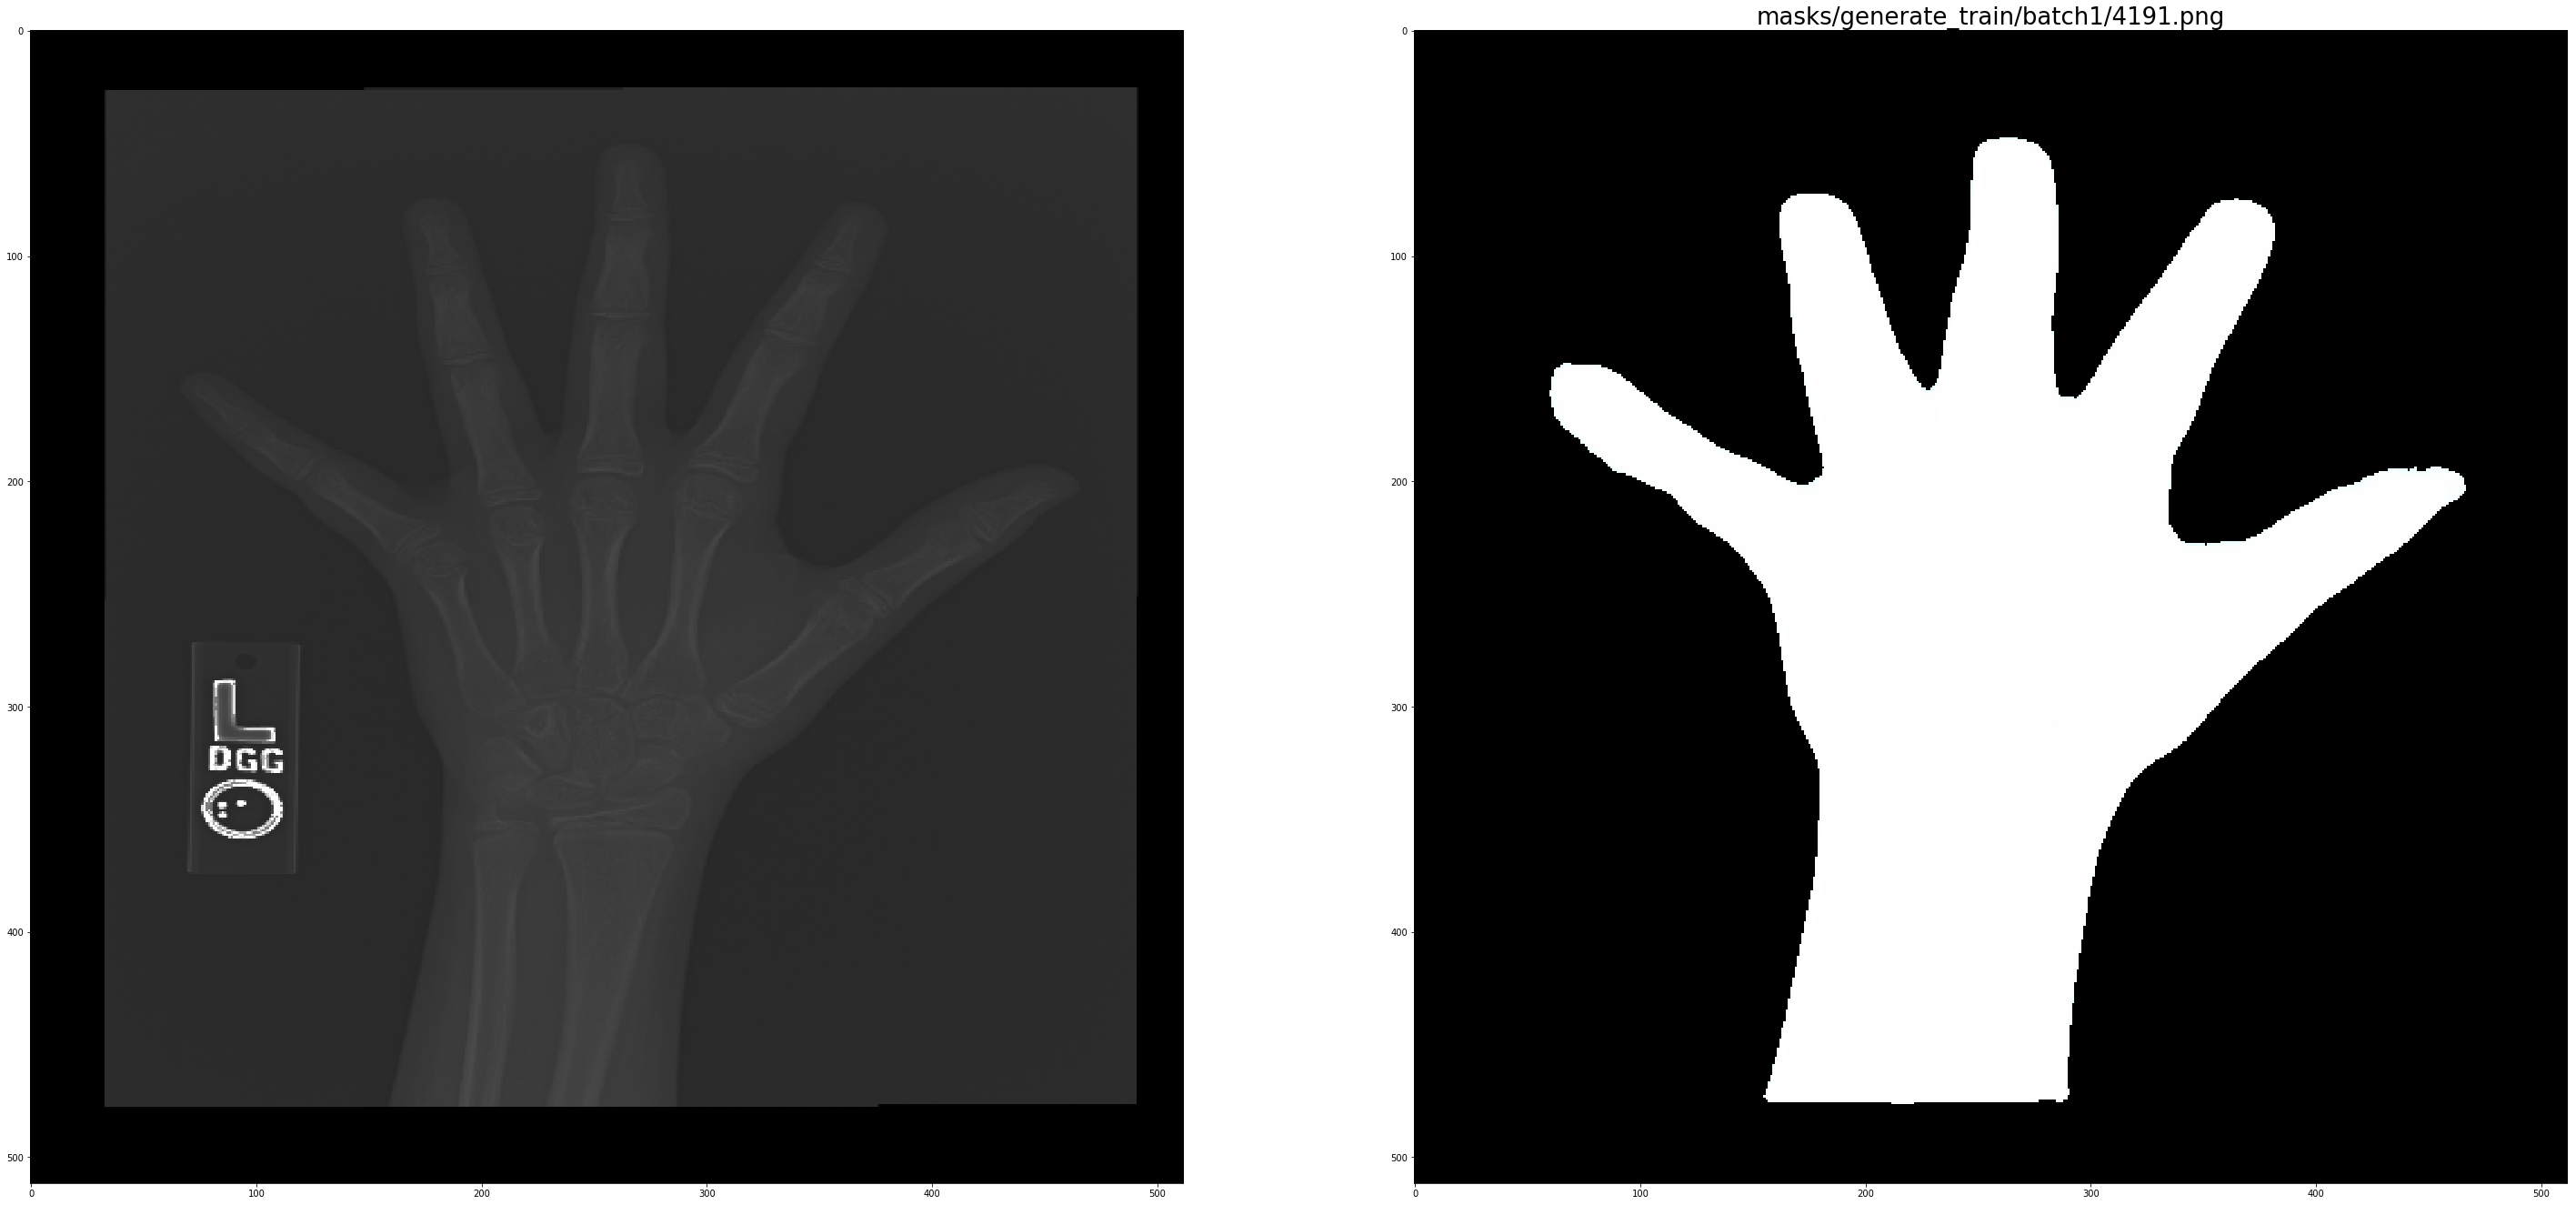

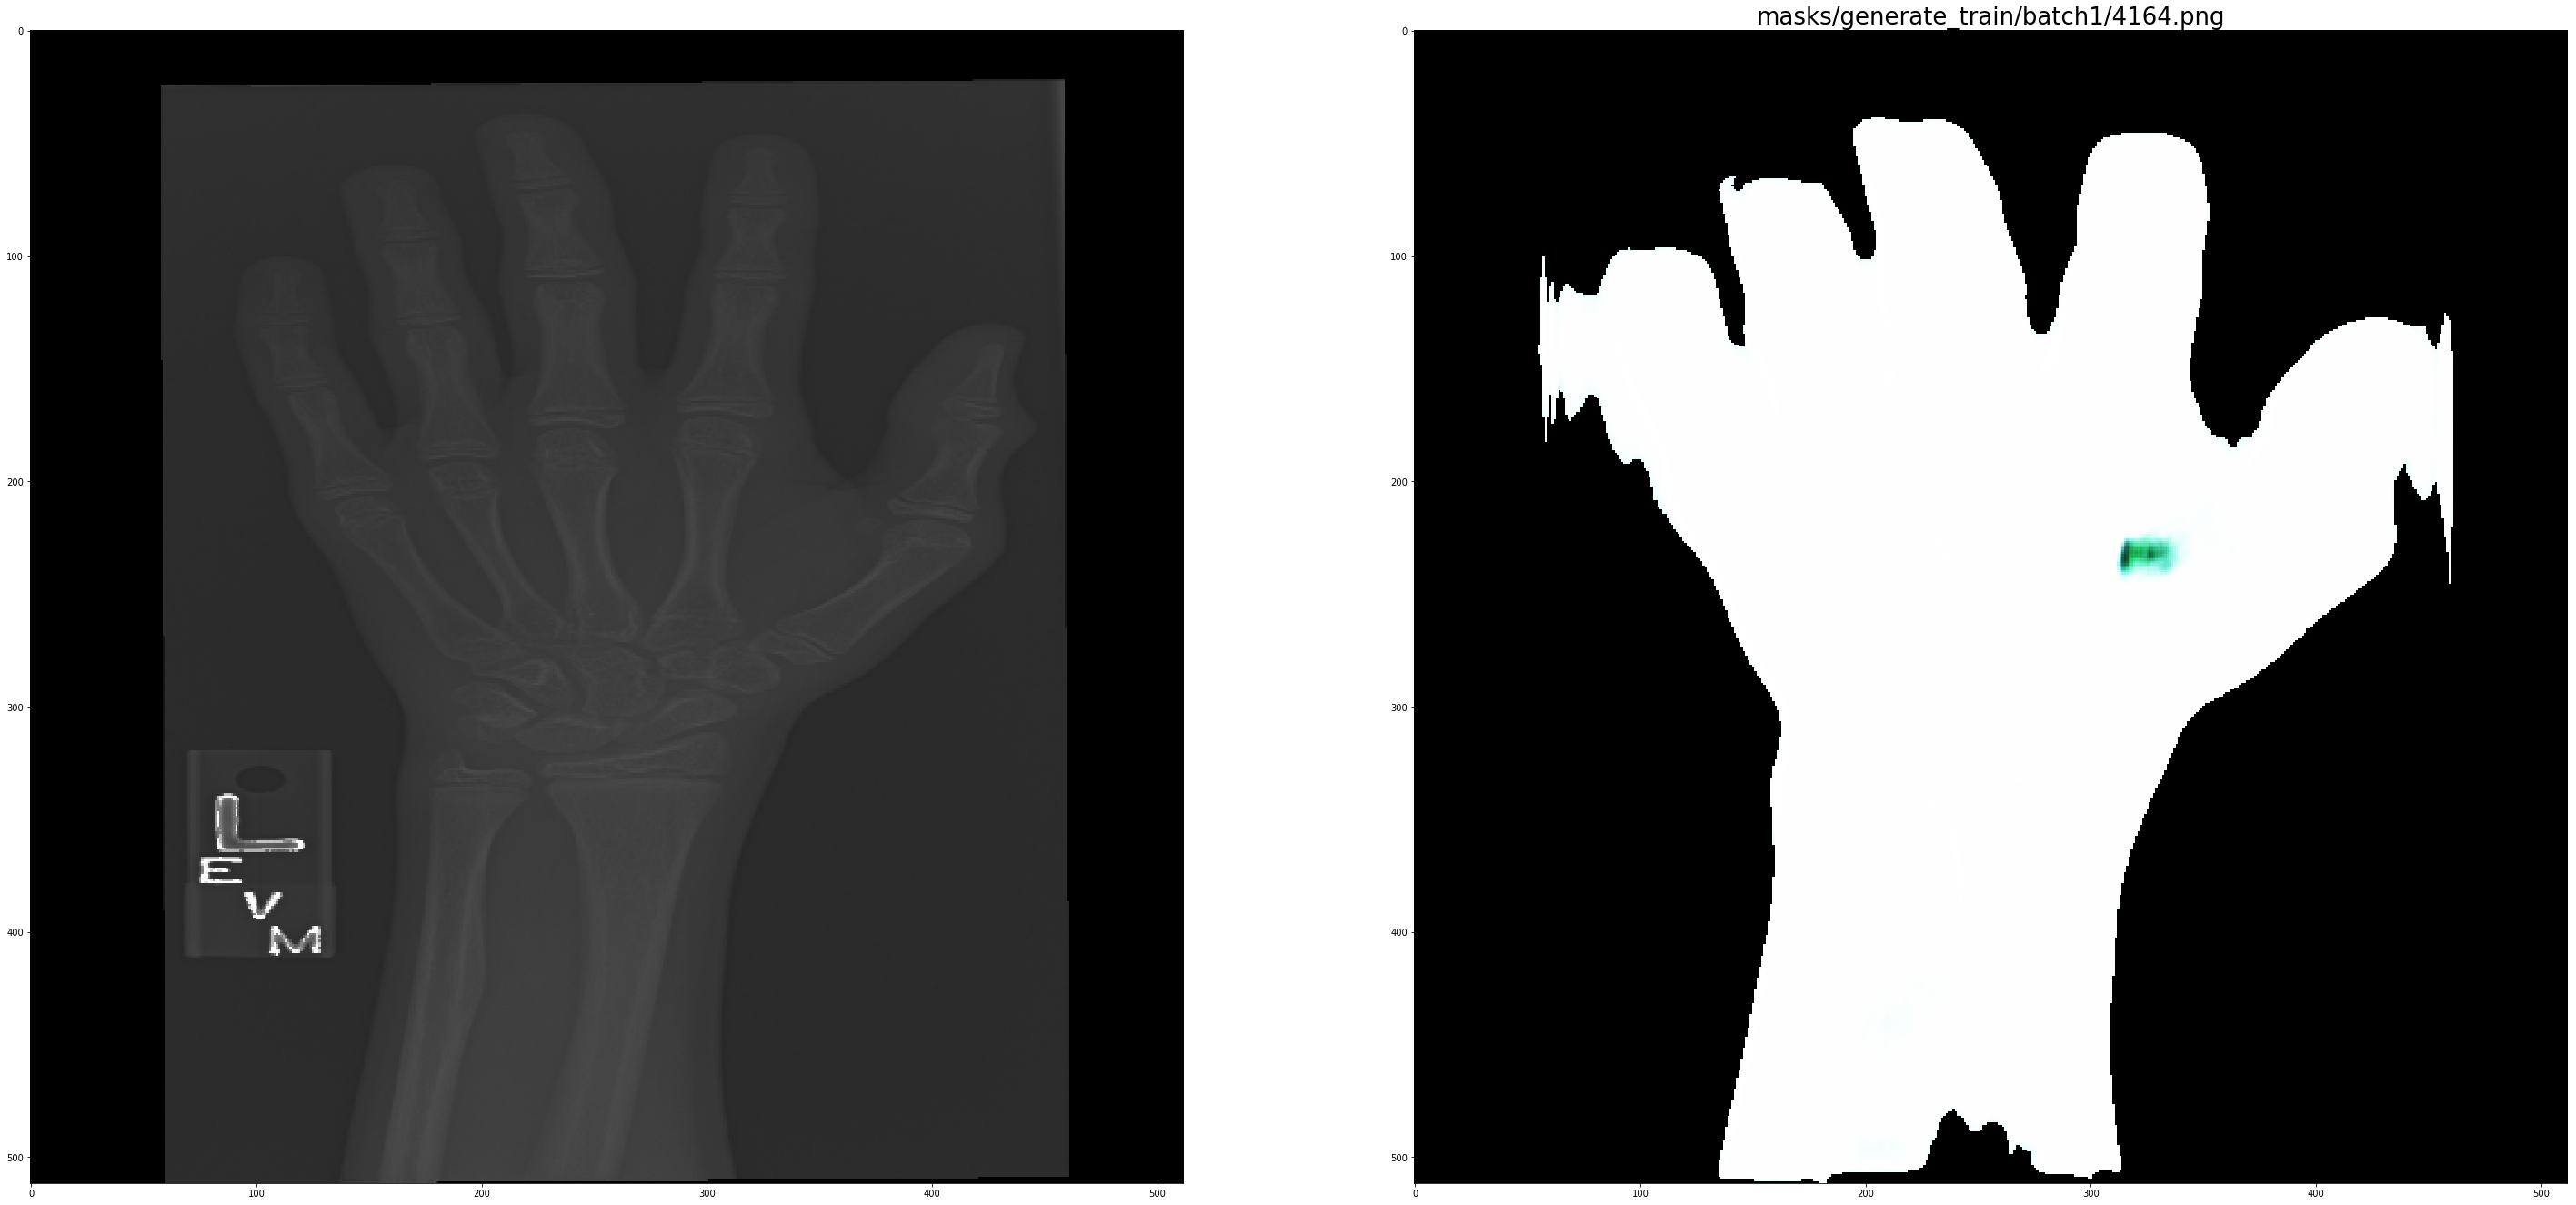

In [ ]:
import glob
count=0
image_size = 512
orig_path = "masks/generate_train/batch1/*"
mask_path = "masks/generate_output/batch1/"
output_mask_path = "masks/output/"
orig = glob.glob(orig_path)
for fl in orig:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (512, 512))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    fig = plt.figure(figsize=(50, 50))    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)

    columns = 2
    rows = 1
    count= count+1
    basenm = ntpath.basename(fl)
    nm_output_mask = output_mask_path+basenm
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
    plt.imshow(output_mask)
    plt.title(fl,fontsize=26)
    plt.show()
    cv2.imwrite(nm_output_mask,output_mask)


In [ ]:
output_mask.shape

In [ ]:
np.append(masks_array,output_mask)

In [ ]:
marks_array.shape

In [ ]:
masks_array[91226111]

In [ ]:
b= np.array([])

In [ ]:
b=np.append(a,np.array([output_mask]))

In [ ]:
a

In [ ]:
!ls

0


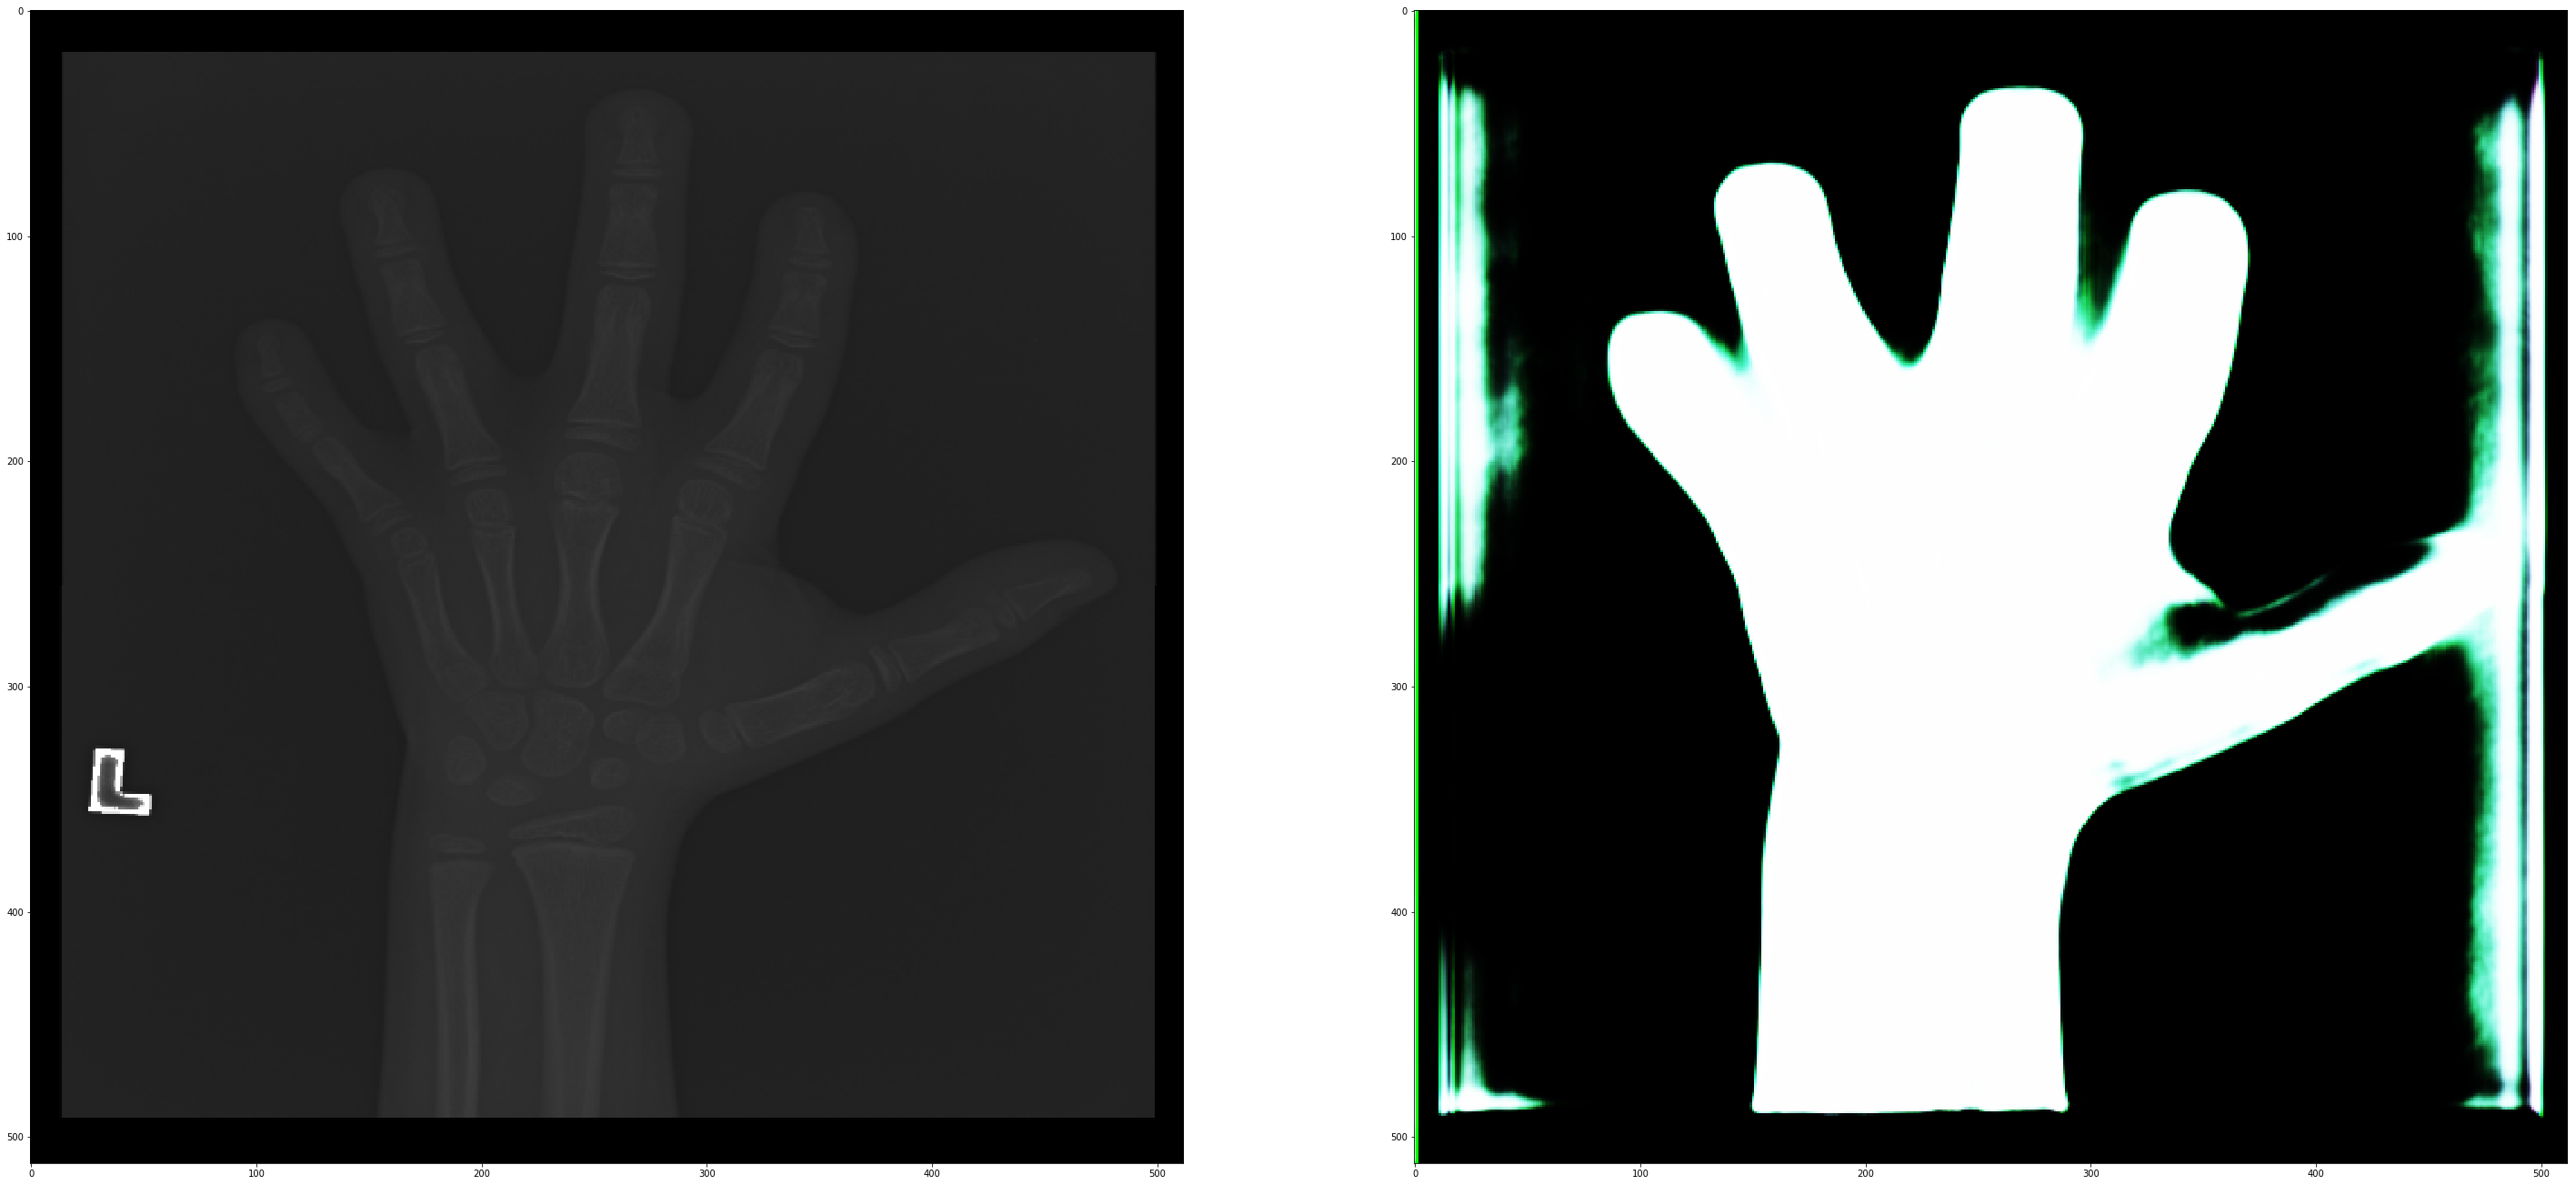

In [7]:
orig_images = cv2.imread('4204.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
output_mask = preprocess_old(a, gray)
fig = plt.figure(figsize=(50, 50))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(orig_images)
fig.add_subplot(rows, columns, 2)
#res = cv2.bitwise_and(orig_images, output_mask)
plt.imshow(output_mask)
plt.show()


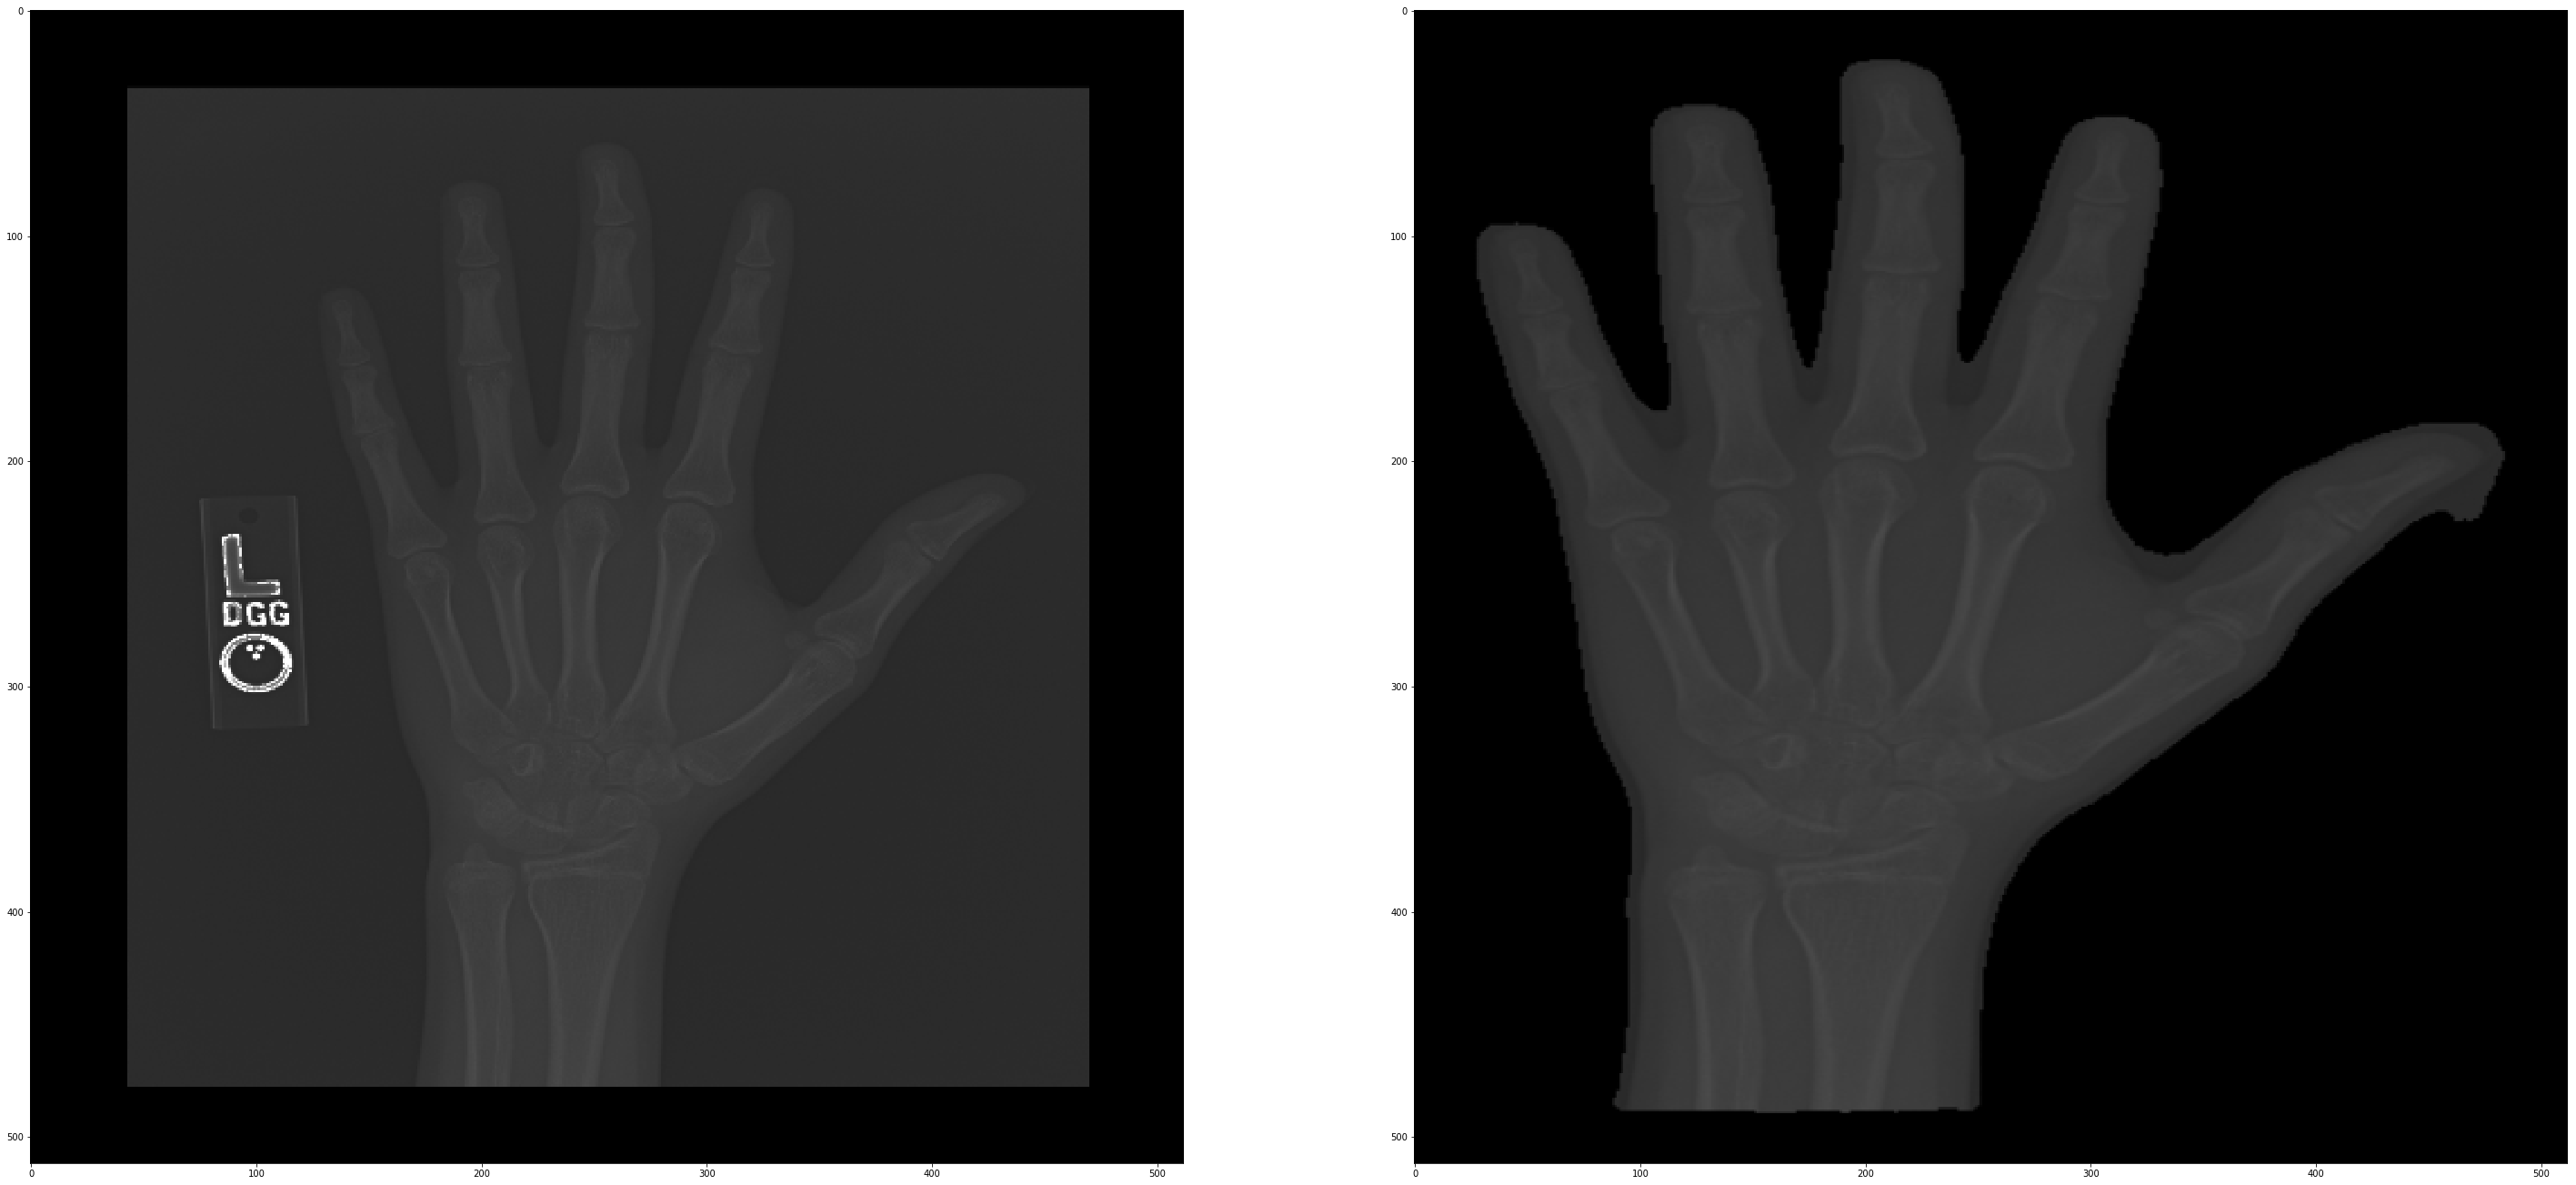

In [8]:
orig_images = cv2.imread('4209.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 250, 255,0)
image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_areas[-1])
mask = np.zeros((512,512),dtype= np.uint8)
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
image = cv2.bitwise_and(orig_images, orig_images, mask=mask)
#cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

roi=image[y-20:y+h+20,x-20:x+w+20]

roi=cv2.resize(roi,(512,512))

fig = plt.figure(figsize=(50, 50))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(orig_images)
fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
plt.imshow(roi)
plt.show()

In [12]:
!ls

01.png	  4229.png				mask.png
1511.png  4237.png				masks
1610.png  4248.png				modeltr_b2.h5
1901.jpg  archive				modeltr_b3.h5
1902.jpg  ConvertAllJpgToPNG.ipynb		modeltr.h5
1902.png  ConvertSupervisely3imagesinto1.ipynb	output.png
1903.jpg  Createnewmasks-batch.ipynb		plot.png
1910.jpg  Createnewmasks-Copy1.ipynb		train
4189.png  Createnewmasks-Copy2.ipynb		Unet-batches.ipynb
4197.png  Createnewmasks-Copy3.ipynb		Unet-Copy1.ipynb
4201.png  Createnewmasks-Copy4.ipynb		Unet.ipynb
4204.png  Createnewmasks.ipynb			unet_train
4209.png  hello.jpg				unet-train.ipynb
4217.png  input.png				Untitled Folder
4221.png  logs


In [9]:
def preprocessmask(gray):
    ret, gray = cv2.threshold(gray, 250, 255,0)
    imageha, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    #x,y,w,h = cv2.boundingRect(largest_areas[-1])
    mask = np.zeros((512,512),dtype= np.uint8)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    return mask

In [51]:
orig_images= cv2.imread('4209.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
k=preprocessmask(gray)


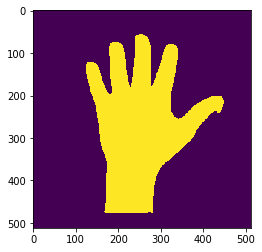

In [52]:
plt.imshow(k)
plt.show()

In [37]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [38]:
def crop_image(img, pads):
    """
    img: numpy array of the shape (height, width)
    pads: (x_min_pad, y_min_pad, x_max_pad, y_max_pad)
    
    @return padded image
    """
    (x_min_pad, y_min_pad, x_max_pad, y_max_pad) = pads
    height, width = img.shape[:2] 
    
    return img[y_min_pad:height - y_max_pad, x_min_pad:width - x_max_pad]

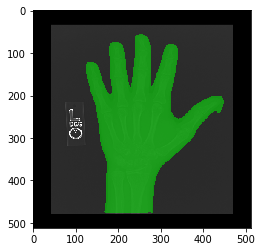

In [53]:
# orig_images= cv2.imread('4209.png')
# orig_images = cv2.resize(orig_images, (512, 512))
# image = np.expand_dims(orig_images, axis=0)
# mpo = model.predict(image)
# a = np.uint8(mpo*255)
# a = a.reshape(512,512,3).astype(np.uint8)
# gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY).astype(np.uint8)
# k=preprocessmask(gray).astype(np.uint8)
# print(gray.shape)
# print(gray.dtype)
# print(a.shape)
# print(a.dtype)
plt.imshow(mask_overlay(orig_images, (k > 0.5).astype(np.uint8)))

In [21]:
gray.shape

(512, 512)

In [22]:
a.shape

(512, 512, 3)

In [31]:
we =np.dstack((gray, gray, gray)) * np.array([0,255,0]).astype(np.uint8)

In [30]:
we.astype(np.uint8).dtype

dtype('uint8')

In [32]:
weighted_sum = cv2.addWeighted(we, 0.5, a, 0.5, 0.)

In [34]:
plt.show(weighted_sum)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [35]:
weighted_sum.shape

(512, 512, 3)

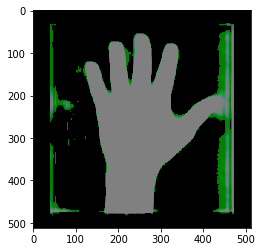

In [36]:
plt.imshow(weighted_sum)
plt.show()

In [48]:
j= (k > 0.5).astype(np.uint8)

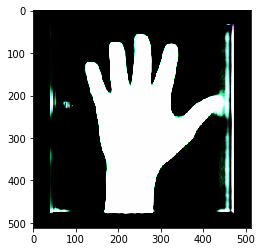

In [50]:
plt.imshow(a)
plt.show()